In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# Quantitative and Forecasting Analysis of Global University Ranking via Economic and Educational Indicators 

Forecasting Country-Level University Rankings Using Economic Indicators: A Comparative Modeling Approach (2017–2023)

### Author Ivan Georgiev Georgiev 

## Abstract 

This study investigates the relationship between national economic, governance, and educational indicators and the performance of countries in the QS World University Rankings between 2017 and 2022. Focusing on the top ten countries by total score per year, the research compares their standings to those of the top ten countries by gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. The analysis is extended to include primary, secondary, and tertiary school enrolment rates as additional educational metrics. Statistical correlations—using Pearson’s $r$, Spearman’s $ρ$, and Kendall’s $τ$ are employed to quantify the strength and direction of the relationships between these indicators and the QS total score. The findings aim to reveal whether strong economic performance and governance directly correspond to higher education quality as measured by global rankings, and to identify which factors are most strongly associated with academic excellence at the national level.

## Introduction 

University rankings such as the QS World University Rankings are widely regarded as benchmarks for educational quality and global academic competitiveness. Countries that consistently host top-performing institutions are often seen as knowledge hubs, attracting international students, faculty, and investment.

Understanding what drives a country's university ranking performance is essential not only for educational policy but also for long-term socio-economic planning. Among the possible factors influencing rankings, economic indicators such as GDP (Gross Domestic Product) play a pivotal role, reflecting the country’s investment capability in education, research, and infrastructure.

University rankings have become an influential benchmark for assessing higher education systems worldwide, shaping perceptions of academic quality, research productivity, and global competitiveness. Among these, the QS World University Rankings are widely recognized for evaluating institutions based on a combination of academic reputation, research impact, faculty-student ratio, and internationalization. However, the extent to which these rankings reflect broader national conditions—such as economic strength, governance quality, and investment in education—remains a subject of ongoing debate.

This study focuses on the period 2017–2022, examining the top ten countries by QS total score per year and comparing them to the top ten countries ranked by key macroeconomic and governance indicators: gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. In addition, the analysis incorporates primary, secondary, and tertiary school enrolment rates to provide a more complete picture of educational ecosystems.

The research is structured in two main parts. The first part is a comparative analysis of rankings across these indicators, highlighting overlaps and discrepancies between countries leading in higher education and those excelling economically or in governance. The second part applies statistical correlation techniques—including Pearson’s correlation coefficient, Spearman’s rank correlation, and Kendall’s tau—to quantify relationships between the QS total score and each indicator. This dual approach allows for both descriptive and inferential insights, offering a clearer understanding of the interplay between national contexts and university performance.

By bridging macro-level socio-economic indicators with university rankings, this study contributes to the literature on higher education policy and competitiveness, potentially informing strategies for improving both educational quality and international ranking outcomes.

Motivation University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

Research Questions

To what extent do indicators like GDP per capita, literacy rate, and R&D investment correlate with average university rank?

Can time series and regression-based models accurately forecast future rankings using this data?

Which forecasting methods provide the most reliable and interpretable predictions?

Significance The ability to anticipate changes in a country's academic standing can inform education policy, international collaboration, and investment decisions. It also helps identify which countries are likely to improve or decline in global academic competitiveness — and why.

## Previous Work Preview

## Correlation and Forecasting Models Overview/General Principles 

This section outlines the statistical methods used to quantify the relationship between the $textit${QS World University Rankings} and selected economic and educational indicators, including GDP per capita, government effectiveness, research and development (R\&D) expenditure, literacy rates, and primary/tertiary school attendance.

- Pearson Correlation Coefficient

The Pearson correlation coefficient, denoted as $r$, measures the strength and direction of a $\mathbf{linear}$ relationship between two continuous variables. Its value lies within the interval $[-1, 1]$, where $r = +1$ indicates perfect positive correlation, $r = -1$ indicates perfect negative correlation, and $r = 0$ indicates no linear correlation.


\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}
where $x_i, y_i$ are paired observations, and $\bar{x}, \bar{y}$ denote their respective means.

In the context of this study, Pearson's $r$ identifies whether indicators such as GDP per capita or literacy rate exhibit a direct proportionality with the QS \textit{total\_score}.

- Spearman’s Rank Correlation Coefficient
Spearman’s $\rho$ is a non-parametric measure that assesses the strength and direction of a $\mathbf{linear}${monotonic} relationship between two variables, without assuming linearity. It operates on the ranked values of the data.

\begin{equation}
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
\end{equation}
where $d_i = R(x_i) - R(y_i)$ is the difference between the ranks of $x_i$ and $y_i$, and $n$ is the number of observations.

In this project, Spearman’s $\rho$ is useful when increases in an economic or educational indicator correspond to increases in QS rankings, but not necessarily in a proportional manner.

- Kendall’s Tau Coefficient
Kendall’s $\tau$ is another rank-based correlation measure that evaluates the correspondence between the orderings of two datasets by counting concordant and discordant pairs.

Let $C$ be the number of concordant pairs and $D$ the number of discordant pairs:

\begin{equation}
\tau = \frac{C - D}{\frac{1}{2}n(n-1)}
\end{equation}

A pair $(x_i, y_i)$ and $(x_j, y_j)$ is \textit{concordant} if $(x_i - x_j)(y_i - y_j) > 0$, and \textit{discordant} if $(x_i - x_j)(y_i - y_j) < 0$.

Kendall’s $\tau$ is particularly appropriate for assessing the similarity of country rankings across QS scores and other indicators.

- Top-20 Comparative Overlap

To evaluate the similarity between the top-performing countries by QS $\mathbf{linear}${total\_score} and those ranked highly in a given indicator, the \textbf{overlap percentage} is calculated:

\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{20} \times 100
\end{equation}
where $T_Q$ is the set of top 20 countries by QS score, and $T_I$ is the set of top 20 countries by a given indicator.

This metric provides a direct measure of elite-set similarity between the QS rankings and indicator-based rankings.

- Data Standardization

Since economic and educational indicators are measured on different scales, variables are standardized before correlation analysis:

\begin{equation}
Z_{i} = \frac{x_i - \mu}{\sigma}
\end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation of the variable.

Standardization ensures comparability and prevents scale differences from biasing the correlation analysis.

Summary

These methods together offer a comprehensive view of the relationships between national-level economic and educational performance and global university rankings.

### Linear Trend Extrapolation
To model simple growth or decline over time and provide a baseline forecast.

Concept:
Assumes a linear relationship between time $t$ and the response variable $y_t$ (e.g., score). 
$$\hat{y}_t = \beta_0 + \beta_1 t$$
Where $\beta_0$ is the intercept, and $\beta_1$ is the slope (change in score per year).

### Correlation & Regression 
To explore whether economic performance influences university rankings.

**Methods**
Pearson correlation for linear relationships

Spearman correlation for monotonic (not necessarily linear)

Simple linear regression to model effect of GDP on score

Simple Linear Regression Equation:
$$
\hat{y}_t = \beta_0 + \beta_1 \cdot \text{GDP}_t + \varepsilon_t
$$

## Experiment Setup and Methodology
### Datasets
**University Rankings (QS)**
Source: QS World University Rankings datasets (2017–2024)

Features used: Institution Name, Country, Year, Overall Score.

Derived features: Average score per country per year, Number of ranked universities per country per year

**GDP Data**
Source: [World Bank] 

Features used: Country, Year, GDP (constant USD), GDP per capita (optional) 

https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.PCAP.CD&country=#

**Preprocessing**

- Standardized country names to match QS data.

- Filled missing values using linear interpolation or forward fill.

- Converted to time series format indexed by country and year.
### Instance Generation
We limit our focus to the top 10 countries by average QS score and number of universities. Instances are generated using a rolling window where applicable (e.g., for moving average, ARIMA).

In this analysis, total score is used as the primary metric for comparing countries in the QS World University Rankings. This measure, calculated as the sum of all ranked universities’ scores within a country, captures both the scale of the higher education system and the quality of its institutions. It offers a more balanced view than either the number of universities alone, which ignores academic performance, or the average score, which can be skewed by countries with very few ranked universities.

Average score per institution is also examined as a supplementary indicator to highlight cases where countries achieve exceptional quality despite having a small number of ranked universities. For example, Singapore’s consistently high average score reflects a concentrated presence of world-class institutions, demonstrating that per-institution excellence does not always align with total system dominance.

### Performance Metrics
To assess model performance, we use the following metrics on the 2023 forecast results:

| Metric                           | Formula                                | Interprets                            |   |                       |
| -------------------------------- | -------------------------------------- | ------------------------------------- | - | --------------------- |
| **MAE (Mean Absolute Error)**    | ( \frac{1}{n} \sum                     | y\_t - \hat{y}\_t                     | ) | Avg. absolute error   |
| **MSE (Mean Squared Error)**     | $\frac{1}{n} \sum (y_t - \hat{y}_t)^2$ | Penalizes large errors                |   |                       |
| **RMSE**                         | $\sqrt{MSE}$                           | More interpretable than MSE           |   |                       |
| **MAPE (Mean Absolute % Error)** | ( \frac{100%}{n} \sum \left            | \frac{y\_t - \hat{y}\_t}{y\_t} \right | ) | Relative error metric |


Each model’s prediction will be evaluated per country, and results will be summarized with visualizations and error tables.

### Methodologies Applied

We test and compare the following approaches:

**Baseline Models**
- Linear Trend Extrapolation
- Moving Average (Windowed)
- Exponential Smoothing (Simple + Holt-Winters)

**Time-Series Models**
- ARIMA(p,d,q) — Auto-selected by AIC/BIC grid search
- ARIMAX(p,d,q) with GDP — GDP used as exogenous regressor

**Correlation & Regression Models**
- Pearson / Spearman correlation between:
    -GDP and average university score
    -GDP and number of universities
- Linear regression:
$$
\text{score}_t = \beta_0 + \beta_1 \cdot \text{GDP}_{t-1} + \varepsilon_t
$$

### Validation and Assumptions
**Time Series Assumptions**
- Stationarity tested using ADF test
- Residual diagnostics applied to ARIMA models

**GDP as Exogenous**
- Assumes GDP from year $t−1$ influences rankings in year $t$

**Missing Data**
- Rows with missing scores were removed
- GDP gaps filled with forward fill or interpolation

### Experimental Design
Training Period: 2017–2022

Forecast Target: 2023

Test Comparison: Compare predictions to real 2023 QS scores

Top Countries Tracked:

Based on average score and number of institutions over 2017–2022

### Model Configuration and Hyperparameter Selection

| Model          | Parameters / Notes                                   |
| -------------- | ---------------------------------------------------- |
| Linear Trend   | Fitted by OLS regression                             |
| MA             | Window size = 3 years (2019–2021 for 2022)           |
| Exp. Smoothing | Alpha optimized using `statsmodels`                  |
| Holt-Winters   | Seasonal period = 1 (no strong seasonality expected) |
| ARIMA          | Grid search over p, d, q with AIC/BIC selection      |
| ARIMAX         | Same as ARIMA, with lagged GDP as external input     |



## QS University Dataset- Exploratory Data Analysis (EDA)

**Objective**
The EDA section examines how country-level indicators relate to average QS university rankings and identifies patterns, trends, and correlations in the data from 2017–2022.

### Data Overview
For University Ranking dataset we will display basic information and summaries. We will show the number of countries, years covered and display sample rows. As part of the data overview we will check data types, missing values, and duplicate entries.
### Data Cleaning
In respect to missing values, we observe that in the dataset we have 3642 missing values. Since, we are focuisng on the top 300 universities, we check for the data there. We drop the 7 missing scores (e.g., mean/linear interpolation). We standardize country names. We check for outliers using boxplots and see if we can identify countries with extremely low or high scores

In [13]:
# Load dataset
df_rank = pd.read_csv("data/world-university-rankings-2017-to-2022.csv")

In [14]:
# Display basic information
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [15]:
df_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6482.0,2019.693613,1.716683,2017.0,2018.0,2020.0,2021.000,2022.0
score,2820.0,46.595532,18.813110,23.5,31.8,40.6,58.025,100.0
student_faculty_ratio,6407.0,13.264554,6.604294,1.0,9.0,12.0,17.000,67.0


In [16]:
df_rank.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [17]:
num_countries_rank = df_rank['country'].nunique()
num_years_rank = df_rank['year'].nunique()
print(f"Ranking Dataset: {num_countries_rank} countries, {num_years_rank} years")

Ranking Dataset: 97 countries, 6 years


In [18]:
print("Missing Values in Ranking Dataset:")
print(df_rank.isnull().sum())

Missing Values in Ranking Dataset:
university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64


In [19]:
# Convert rank_display to numeric 
df_rank['rank_display'] = pd.to_numeric(df_rank['rank_display'], errors='coerce')

# Filter top 300 universities for each year
df_top300 = df_rank[df_rank['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300['score'].isna().sum()
total_count = len(df_top300)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# check missing by year
missing_by_year = df_top300.groupby('year')['score'].apply(lambda x: x.isna().sum())
print("\nMissing scores by year:")
print(missing_by_year)

Total entries in top 300: 1802
Missing score entries: 7
Missing percentage: 0.39%

Missing scores by year:
year
2017    0
2018    2
2019    2
2020    3
2021    0
2022    0
Name: score, dtype: int64


In [20]:
df_top300.to_csv("top300_universities.csv", index=False)

In [21]:
df_top300.shape

(1802, 15)

### Feature Engineering and Country Rankings and Selections
We compute the average score per country per year, the total score per country per year and the number of ranked universities per country per year. 

We select the Top 10 countries for three perspectives:

- by total QS score (2017–2022)
- by number of universities ranked
- by average score (2017–2022)

##### Main Justification for Using Total Score
For the purposes of this analysis, the total score is selected as the primary indicator of country-level performance in the QS World University Rankings. This metric, calculated as the sum of the scores of all ranked universities within a country for a given year, offers a balanced view by incorporating both the number of ranked institutions and their relative quality. Unlike the number of universities, which measures breadth but ignores academic strength, or the average score, which can be skewed by countries with very few ranked universities, the total score reflects the combined educational and research output of a nation’s higher education system. This makes it a robust measure for identifying the countries with the most substantial overall presence and influence in global higher education.

#### Contextual Insight from Average Score
While total score remains the central focus of this study, average score per ranked university provides valuable contextual insights. This metric highlights countries that may have a relatively small number of ranked institutions but demonstrate exceptional quality at the institutional level. For example, Singapore consistently achieves one of the highest average scores, driven by a small but elite group of globally competitive universities. Such cases illustrate that a country’s overall ranking dominance (captured by total score) does not always correlate directly with per-institution excellence, offering an important secondary perspective in understanding global education performance.

We visualize:
- Bar plots of top 10 countries by three perspective
- Score trends over time for each top country
- Heatmap of score correlations across countries   

In [23]:
# Keep only the columns needed 
df_clean = df_top300[["university", "year", "score", "country"]].copy()

In [24]:
# Strip whitespace and title-case country names
df_clean["country"] = df_clean["country"].str.strip()

# Replace common variations
country_replacements = {
    "USA": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",
    "UK": "United Kingdom",
    "Russia": "Russian Federation",
}
df_clean["country"] = df_clean["country"].replace(country_replacements)

In [25]:
df_clean = df_clean.drop_duplicates(subset=["university", "year", "country"])

In [26]:
# Drop the missing values
df_clean = df_clean.dropna(subset=["score"])

In [27]:
# Convert to int and float
df_clean["year"] = df_clean["year"].astype(int)
df_clean["score"] = df_clean["score"].astype(float)

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 5483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  1795 non-null   object 
 1   year        1795 non-null   int32  
 2   score       1795 non-null   float64
 3   country     1795 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 63.1+ KB


In [29]:
# Step 1: total_score = sum of all university scores per country-year
total_score_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(total_score=("score", "sum"))
)

print(total_score_df.head())

   year    country  total_score
0  2017  Argentina         65.8
1  2017  Australia        884.1
2  2017    Austria        139.0
3  2017    Belgium        318.7
4  2017     Brazil        107.0


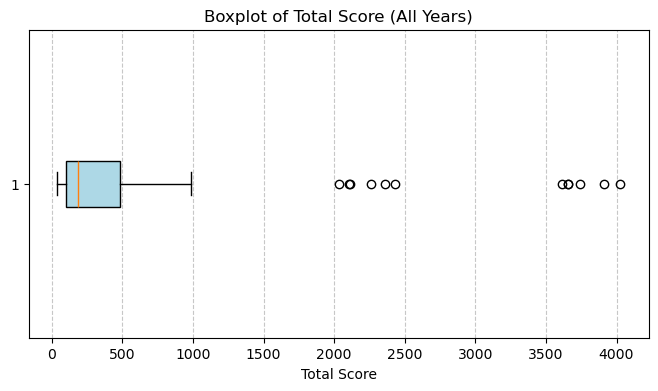

In [30]:
import matplotlib.pyplot as plt

# Boxplot for total_score to visualize outliers
plt.figure(figsize=(8, 4))
plt.boxplot(total_score_df["total_score"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title("Boxplot of Total Score (All Years)")
plt.xlabel("Total Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [31]:
# Step 2: num_universities = count of unique universities per country-year
num_univ_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(num_universities=("university", "nunique"))
)

print(num_univ_df.head())

   year    country  num_universities
0  2017  Argentina                 1
1  2017  Australia                15
2  2017    Austria                 3
3  2017    Belgium                 6
4  2017     Brazil                 2


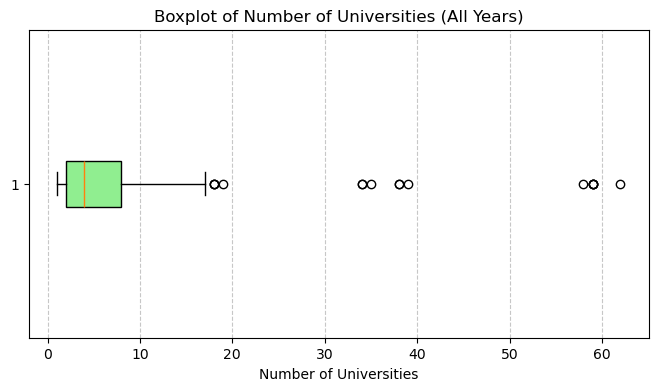

In [32]:
# Boxplot for num_universities
plt.figure(figsize=(8, 4))
plt.boxplot(num_univ_df["num_universities"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Number of Universities (All Years)")
plt.xlabel("Number of Universities")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Merge total_score and num_universities
agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")
print(agg_df.head())

   year    country  total_score  num_universities
0  2017  Argentina         65.8                 1
1  2017  Australia        884.1                15
2  2017    Austria        139.0                 3
3  2017    Belgium        318.7                 6
4  2017     Brazil        107.0                 2


In [34]:
# avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


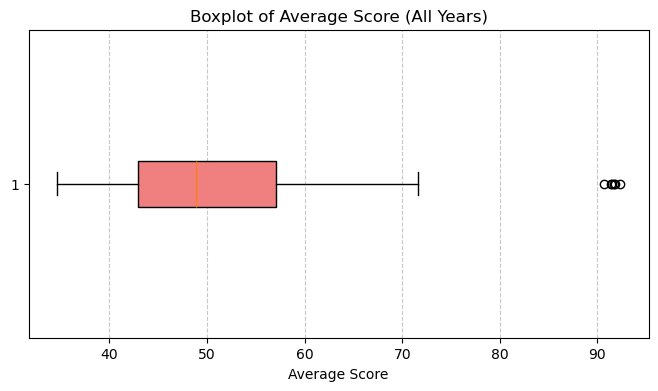

In [35]:
# Boxplot for avg_score
plt.figure(figsize=(8, 4))
plt.boxplot(agg_df["avg_score"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.title("Boxplot of Average Score (All Years)")
plt.xlabel("Average Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [36]:
# avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


### Visualizations

In [38]:
# ---------- 1) Build the aggregated dataset from RAW df ----------
def build_agg_from_raw(df_clean: pd.DataFrame) -> pd.DataFrame:
    """
    Expects columns: ['university','year','score','country'].
    Returns agg_df with: ['year','country','total_score','num_universities','avg_score'].
    """
    need = {"university", "year", "score", "country"}
    missing = need - set(df_clean.columns)
    if missing:
        raise KeyError(f"Raw DF missing columns: {sorted(missing)}")

    df = df_clean.dropna(subset=["country", "year", "score", "university"]).copy()
    df["year"] = df["year"].astype(int)

    total_score_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(total_score=("score", "sum"))
    )
    num_univ_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(num_universities=("university", "nunique"))
    )

    agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")
    agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]
    return agg_df

agg_df.to_csv("agg_university_metrics.csv", index=False)

# ---------- 2) Helper to get top-K per year ----------
def top_k_per_year(df_clean: pd.DataFrame, value_col: str, k: int = 10) -> pd.DataFrame:
    need = {"year", "country", value_col}
    if not need.issubset(df.columns):
        raise KeyError(f"DataFrame must contain: {sorted(need)}")
    return (
        df.sort_values(["year", value_col], ascending=[True, False], kind="mergesort")
          .groupby("year", group_keys=False)
          .head(k)
          .reset_index(drop=True)
    )

# ---------- 3) Plotters (one per metric) ----------
def plot_top10_total_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("total_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["total_score"])
        for i, v in enumerate(d["total_score"]):
            plt.text(v, i, f"{v:.1f}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Total Score ({y})")
        plt.xlabel("Total Score")
        plt.tight_layout()
        plt.show()


def plot_top10_avg_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("avg_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["avg_score"])
        # label with both avg and number of universities
        for i, (v, n) in enumerate(zip(d["avg_score"], d["num_universities"])):
            plt.text(v, i, f"{v:.1f}  |  {n} univ", va="center", ha="left")
        plt.title(f"Top {k} Countries by Average Score ({y})")
        plt.xlabel("Average Score per University")
        plt.tight_layout()
        plt.show()


def plot_top10_num_universities_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("num_universities", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["num_universities"])
        for i, v in enumerate(d["num_universities"]):
            plt.text(v, i, f"{v}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Number of Universities ({y})")
        plt.xlabel("Number of Universities")
        plt.tight_layout()
        plt.show()


# ---------- 4) Example usage ----------
# raw df name assumed to be `df` with cols: university, year, score, country
# agg_df = build_agg_from_raw(df)

# Tables (if you need them):
# top10_total = top_k_per_year(agg_df[["year","country","total_score"]], "total_score", k=10)
# top10_avg   = top_k_per_year(agg_df[["year","country","avg_score","num_universities"]], "avg_score", k=10)
# top10_count = top_k_per_year(agg_df[["year","country","num_universities"]], "num_universities", k=10)

# Plots:
# plot_top10_total_score_per_year(agg_df, k=10)
# plot_top10_avg_score_per_year(agg_df, k=10)
# plot_top10_num_universities_per_year(agg_df, k=10)

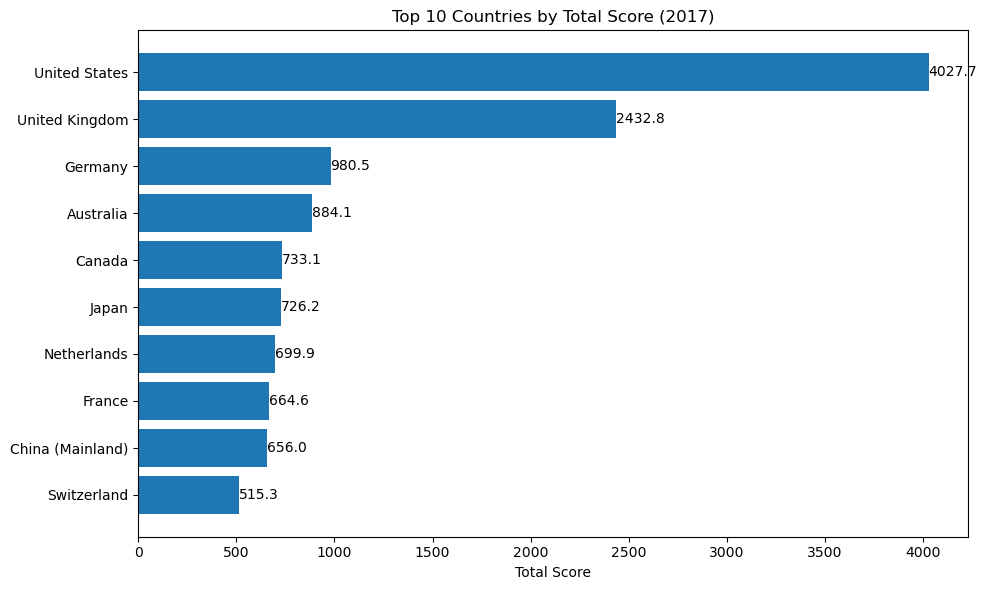

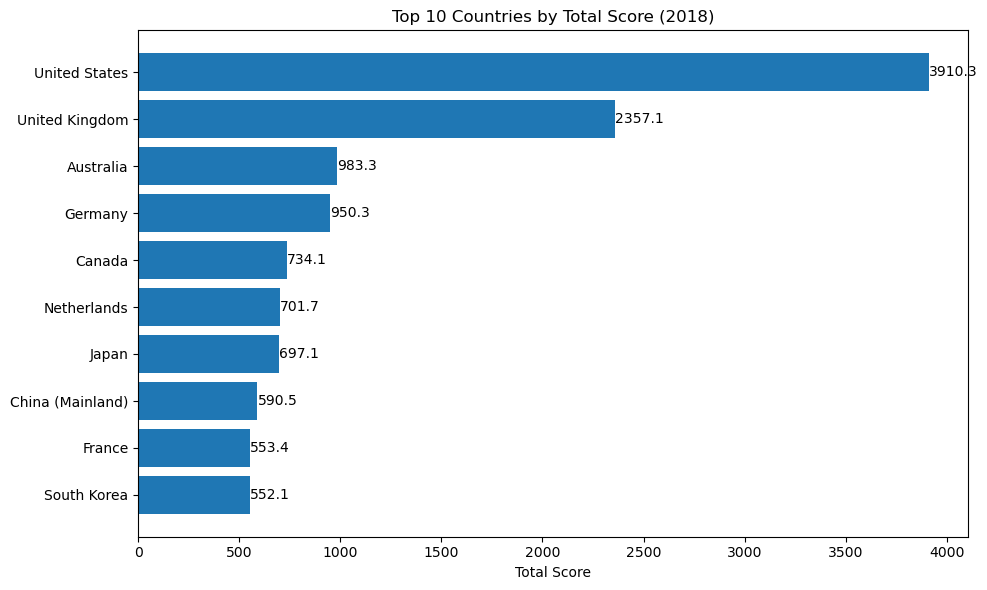

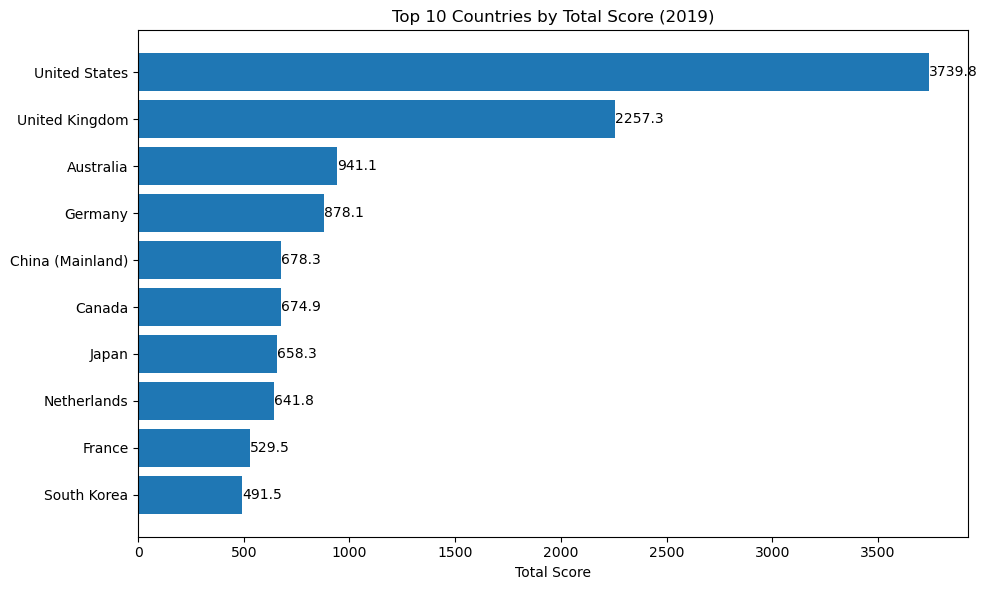

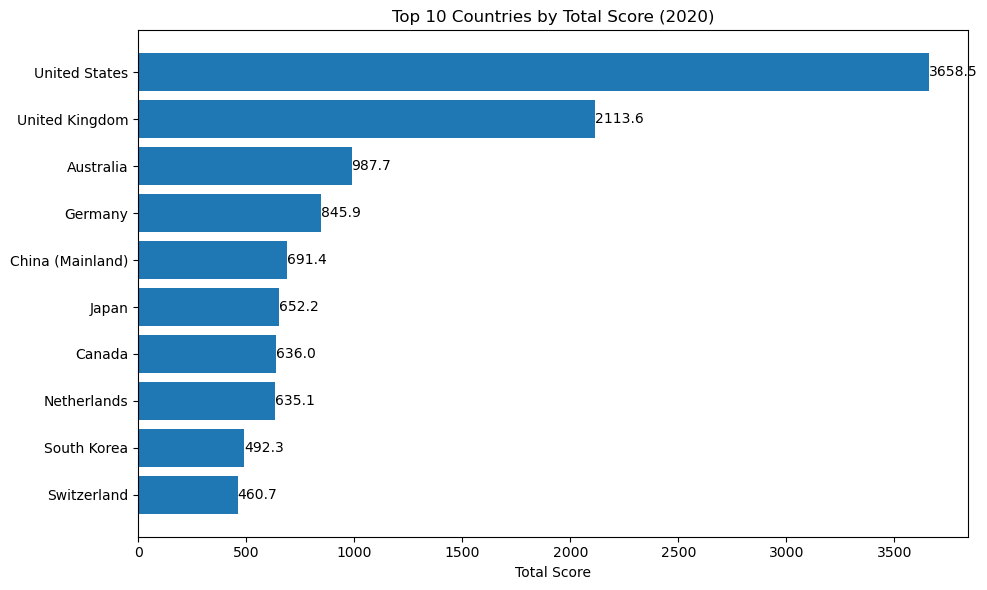

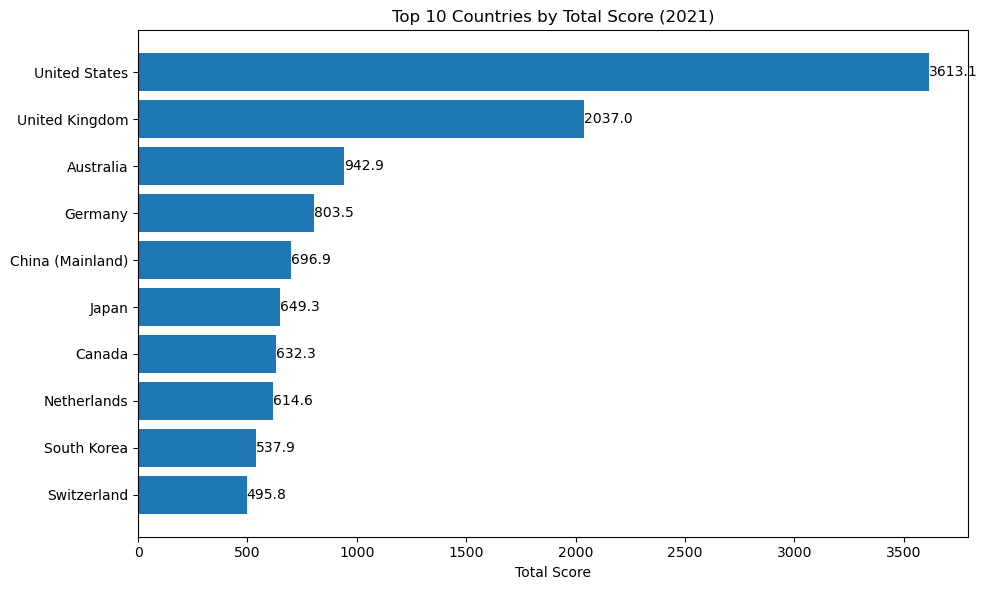

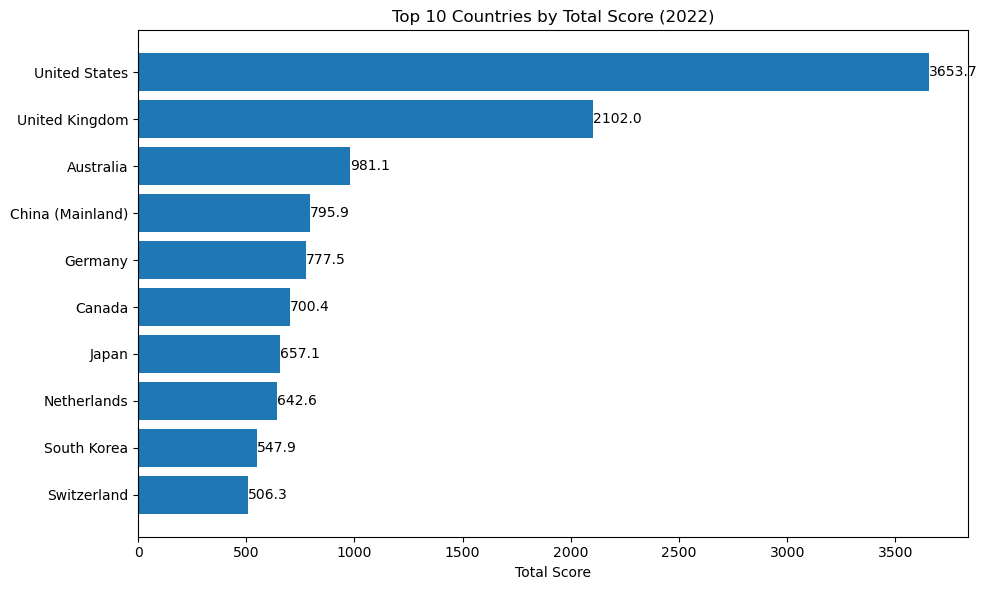

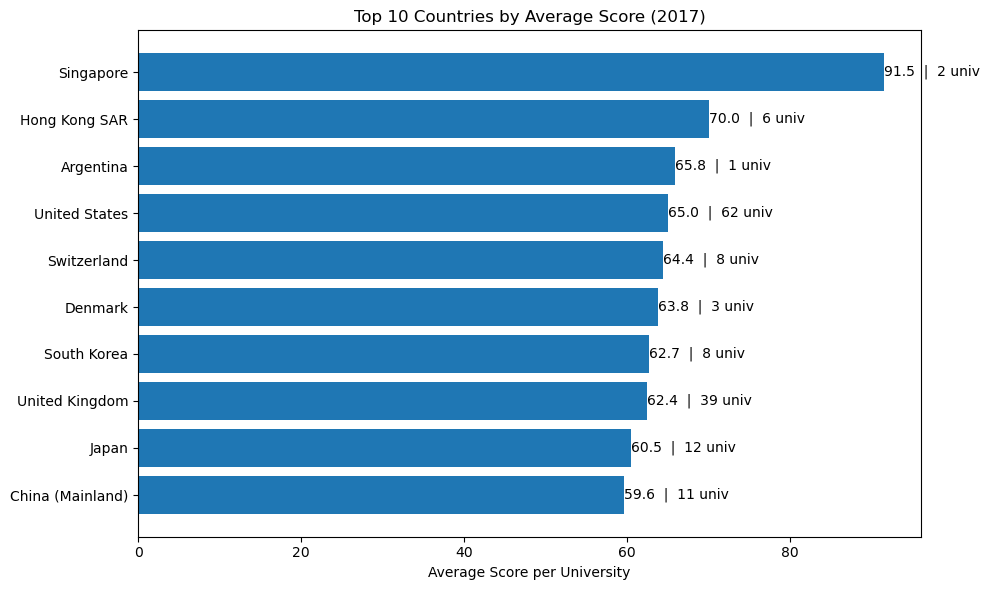

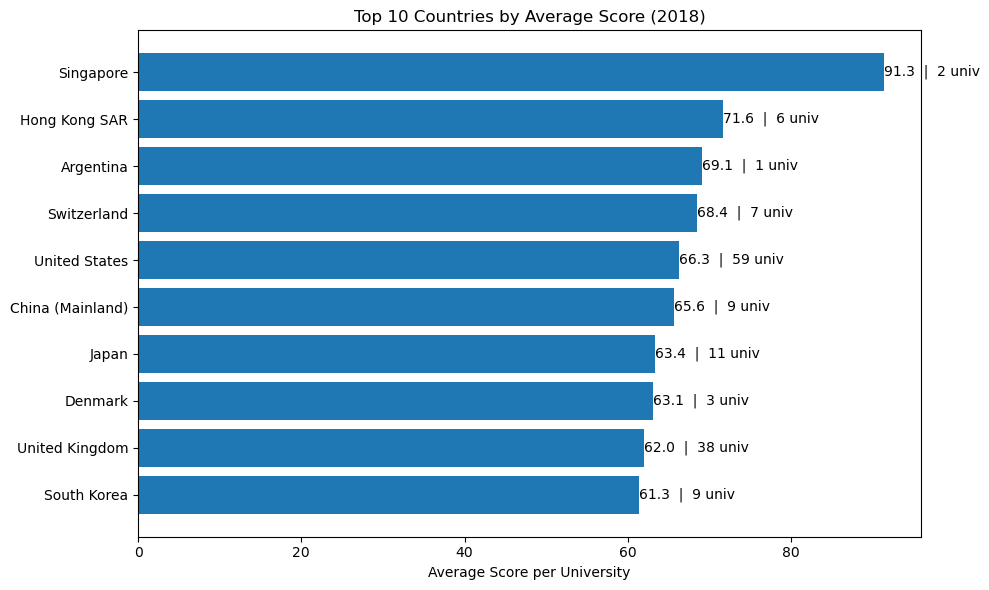

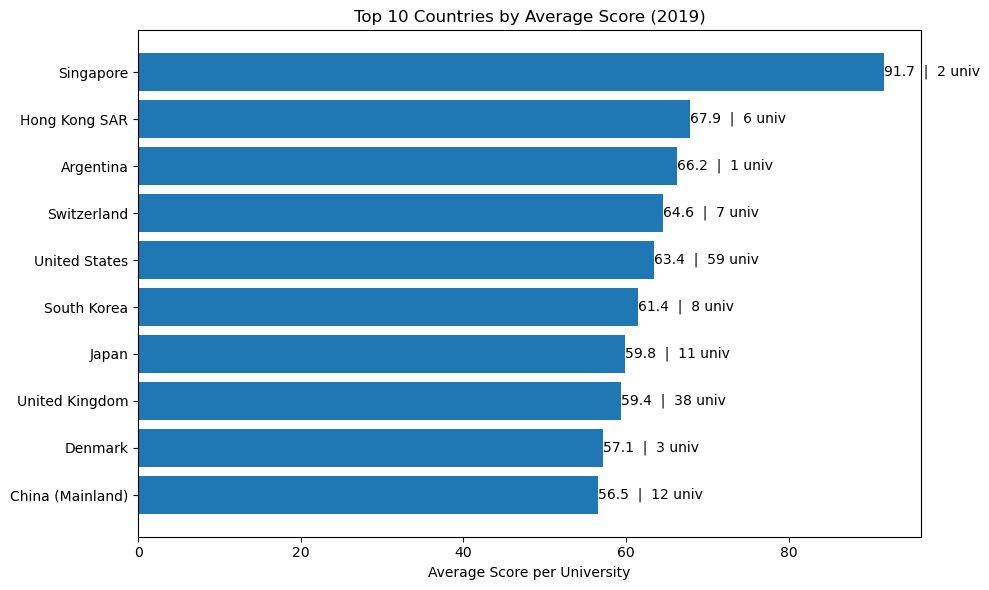

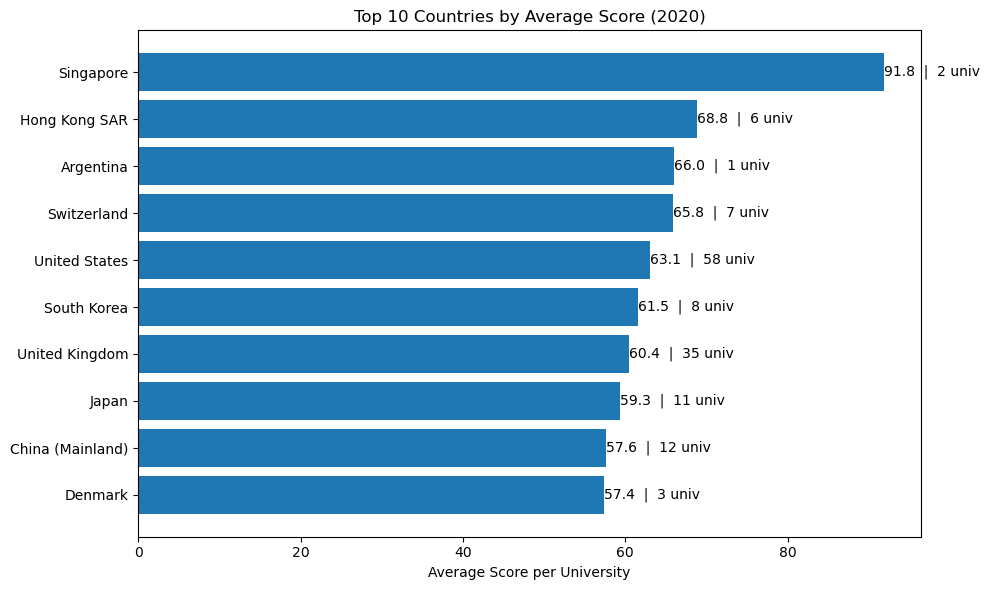

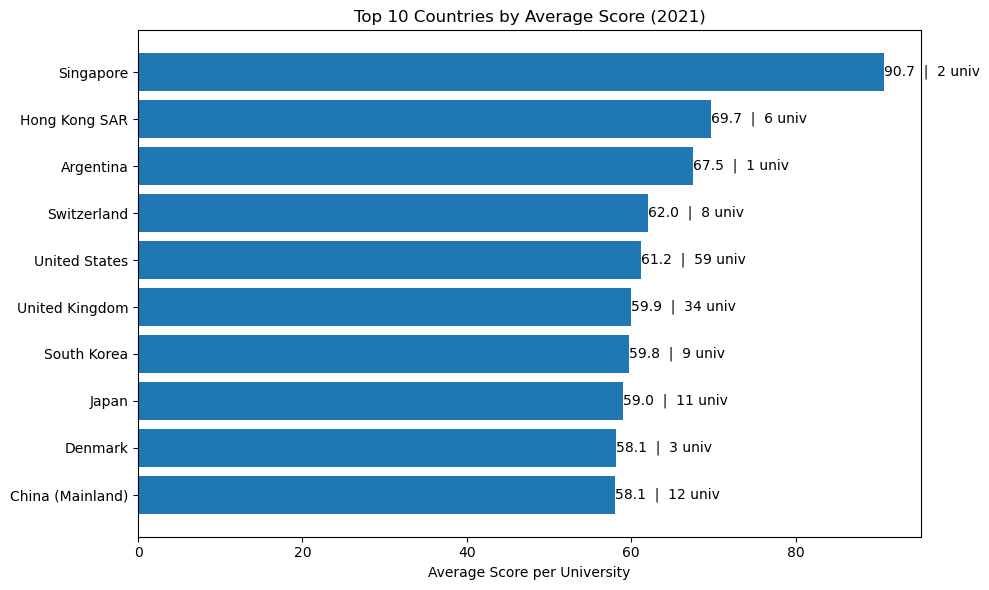

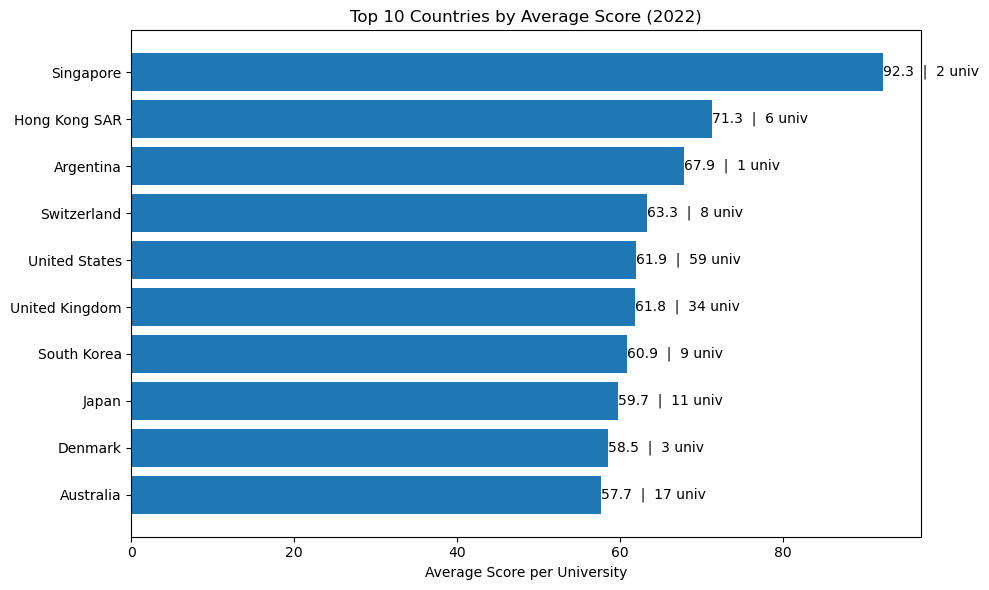

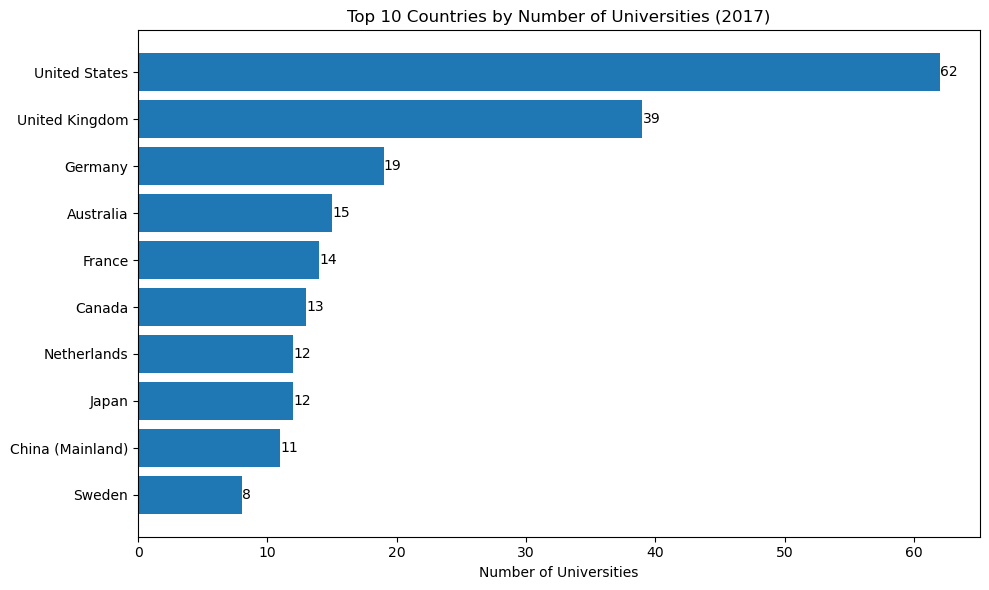

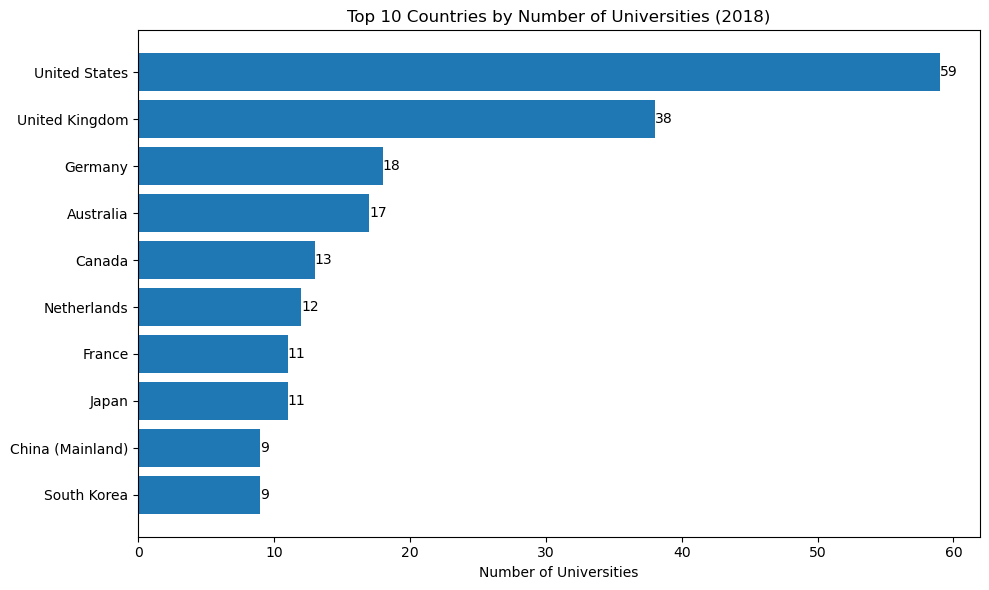

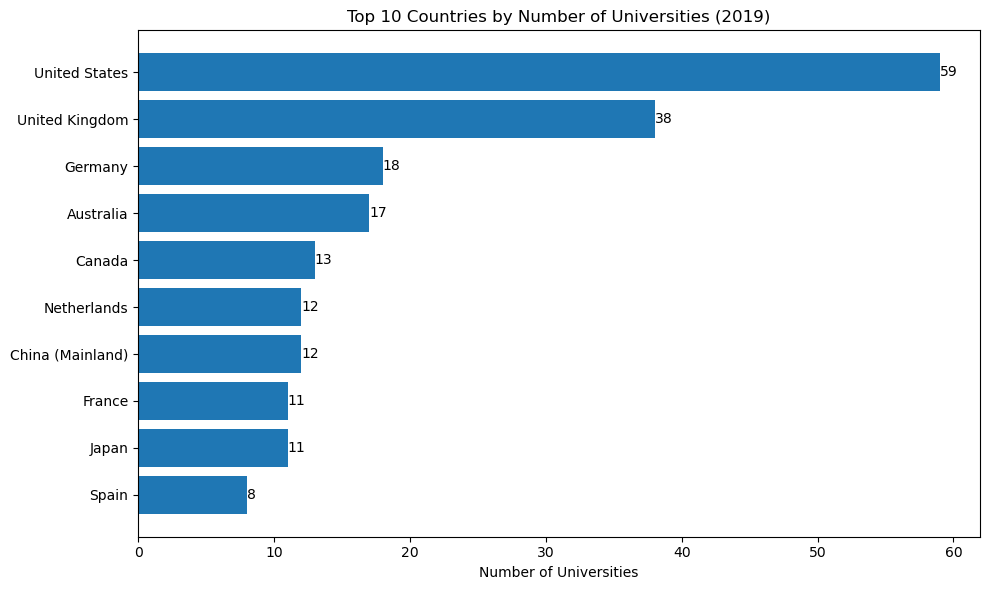

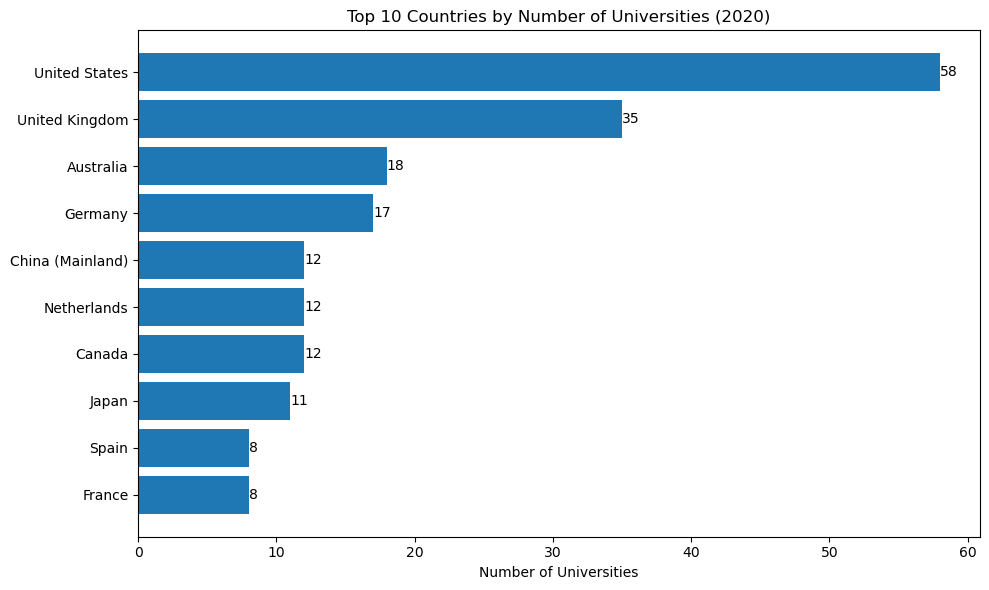

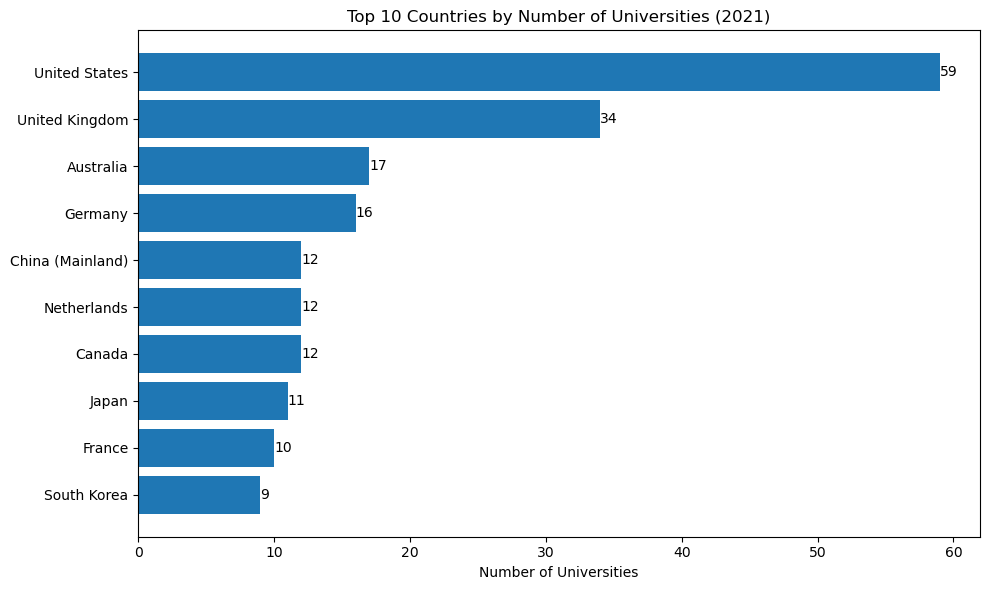

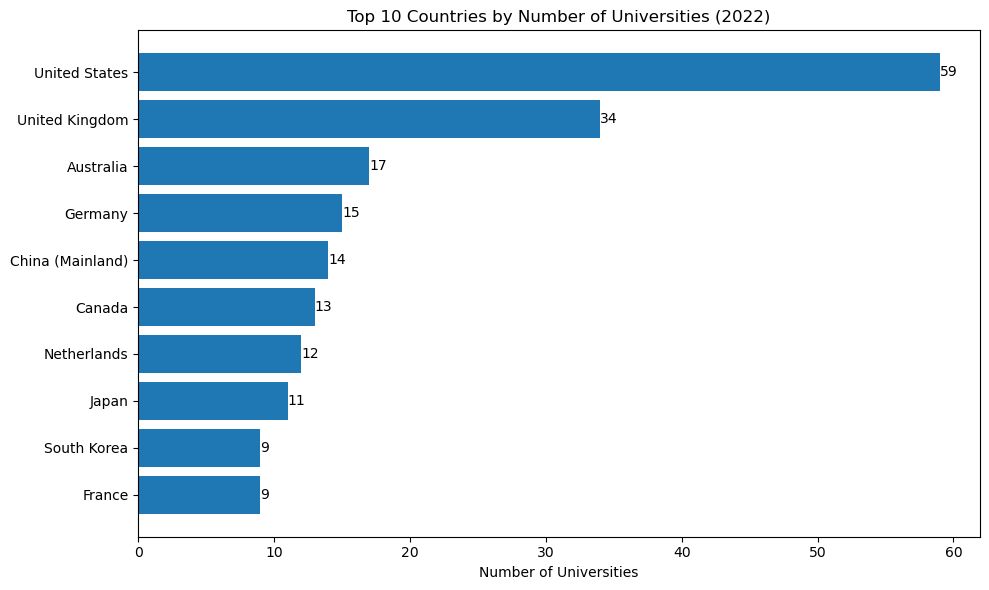

In [39]:
plot_top10_total_score_per_year(agg_df, k=10)
plot_top10_avg_score_per_year(agg_df, k=10)
plot_top10_num_universities_per_year(agg_df, k=10)

## Economic and Educational Indicators

### Overview 
Correlate GDP per capita / total GDP with: Total_score

Methods:

Pearson correlation

Spearman correlation

Simple linear regression

Lagged GDP (t-1) vs score at time t

Scatter plots, heatmaps, and regression lines help here.

### Exploratory Data Analysis for Economic and Educational Indicators 
 

#### GDP 
For GDP dataset we will display basic information and summaries. We will show the number of countries, years covered and display sample rows. As part of the data overview we will

Check data types, missing values, and duplicate entries. Drop or impute missing scores (e.g., mean/linear interpolation). Fill missing GDP values (e.g., forward-fill or interpolate)

Standardize country names. Create a mapping dictionary to ensure consistency between datasets

Drop or flag outliers. Identify countries with extremely low or high scores. Detect GDP outliers using IQR or Z-score. 
Feature Engineering
GDP per capita (GDP ÷ population if available). Score change rate year-over-year (∆Score). GDP growth rate


In [44]:
df_gdp = pd.read_csv("data/gdp.csv")

In [45]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [46]:
df_gdp.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464


In [47]:
df_gdp = df_gdp.replace(r"^\s*\.\.\s*$", np.nan, regex=True)

In [48]:
df_gdp.isna().sum()

Series Name       3
Series Code       5
Country Name      5
Country Code      5
1990 [YR1990]    31
2000 [YR2000]    19
2015 [YR2015]    12
2016 [YR2016]    13
2017 [YR2017]    13
2018 [YR2018]    13
2019 [YR2019]    12
2020 [YR2020]    13
2021 [YR2021]    13
2022 [YR2022]    14
2023 [YR2023]    22
2024 [YR2024]    39
dtype: int64

In [49]:
df_gdp.isna().mean() * 100

Series Name       1.107011
Series Code       1.845018
Country Name      1.845018
Country Code      1.845018
1990 [YR1990]    11.439114
2000 [YR2000]     7.011070
2015 [YR2015]     4.428044
2016 [YR2016]     4.797048
2017 [YR2017]     4.797048
2018 [YR2018]     4.797048
2019 [YR2019]     4.428044
2020 [YR2020]     4.797048
2021 [YR2021]     4.797048
2022 [YR2022]     5.166052
2023 [YR2023]     8.118081
2024 [YR2024]    14.391144
dtype: float64

In [50]:
df_gdp[df_gdp.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,NaN,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,NaN
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,NaN,NaN,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,NaN,NaN
9,GDP per capita (current US$),NY.GDP.PCAP.CD,Aruba,ABW,12187.5363611898,20681.0230269625,27458.2253310273,27441.5296617282,28440.051963759,30082.1276448186,31096.2050738676,22855.9323200761,27200.0610793969,30559.5335346581,33984.7906198041,NaN
22,GDP per capita (current US$),NY.GDP.PCAP.CD,Bhutan,BTN,488.327431477129,771.924911410619,2954.04081911097,3152.30905106786,3435.28804735662,3400.20417245342,3576.87987100503,3191.66906999331,3570.61257980872,3711.32767981591,3839.4093039286,NaN
27,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,GDP per capita (current US$),NY.GDP.PCAP.CD,Cayman Islands,CYM,NaN,NaN,76379.2095108681,77802.2541567187,80053.9444506891,83865.5531568184,88254.2903677044,82338.7982853661,86438.445257404,92202.1478031576,97749.5078960846,NaN
39,GDP per capita (current US$),NY.GDP.PCAP.CD,Channel Islands,CHI,NaN,43479.1940767689,61852.0735568957,55950.1482938989,55806.5708942966,60783.3529257544,60568.108347955,56785.9402005039,66912.1753241171,67627.3084478235,74589.1381155014,NaN
49,GDP per capita (current US$),NY.GDP.PCAP.CD,Cuba,CUB,2694.31697957692,2751.3817714814,7727.91997207998,8110.55873961397,8610.60829531998,8911.46205964193,9232.26115935183,9605.26125067263,NaN,NaN,NaN,NaN
50,GDP per capita (current US$),NY.GDP.PCAP.CD,Curacao,CUW,NaN,15841.2612359949,19361.8130008678,18944.0961493998,18938.2440469703,19119.1243941688,19220.6865793075,16356.0933254541,17979.9982909306,20501.7522782219,21061.741639092,NaN
61,GDP per capita (current US$),NY.GDP.PCAP.CD,Eritrea,ERI,NaN,314.357396753501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# First, replace ".." with NaN if you haven't already
import numpy as np
df_gdp = df_gdp.replace(r"^\s*\.\.\s*$", np.nan, regex=True)

# Convert numeric year columns to float
year_cols = [col for col in df_gdp.columns if "[YR" in col]
df_gdp[year_cols] = df_gdp[year_cols].astype(float)

# Interpolate row-wise across years
df_gdp[year_cols] = df_gdp[year_cols].interpolate(axis=1, limit_direction="both")

In [52]:
df_gdp.isna().sum()

Series Name      3
Series Code      5
Country Name     5
Country Code     5
1990 [YR1990]    9
2000 [YR2000]    9
2015 [YR2015]    9
2016 [YR2016]    9
2017 [YR2017]    9
2018 [YR2018]    9
2019 [YR2019]    9
2020 [YR2020]    9
2021 [YR2021]    9
2022 [YR2022]    9
2023 [YR2023]    9
2024 [YR2024]    9
dtype: int64

In [53]:
df_gdp[df_gdp.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
27,GDP per capita (current US$),NY.GDP.PCAP.CD,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,GDP per capita (current US$),NY.GDP.PCAP.CD,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,GDP per capita (current US$),NY.GDP.PCAP.CD,"Korea, Dem. People's Rep.",PRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,GDP per capita (current US$),NY.GDP.PCAP.CD,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Last Updated: 07/01/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Keep only GDP per capita (current US$)
gdp_filtered = df_gdp[df_gdp["Series Name"] == "GDP per capita (current US$)"].copy()

# Drop unneeded columns
gdp_filtered = gdp_filtered.drop(columns=["Country Code", "Series Code", "Series Name"], errors="ignore")
gdp_filtered = gdp_filtered.loc[:, ~gdp_filtered.columns.str.contains("^Unnamed")]

# Reshape from wide to long format
gdp_long = gdp_filtered.melt(id_vars=["Country Name"], var_name="year", value_name="gdp_per_capita")

# Clean year strings like "2017 [YR2017]" -> "2017"
gdp_long["year"] = gdp_long["year"].str.extract(r"(\d{4})")

# Continue with steps
gdp_long = gdp_long.rename(columns={"Country Name": "country"})
gdp_long["year"] = pd.to_numeric(gdp_long["year"], errors="coerce")
gdp_long = gdp_long.dropna(subset=["year", "gdp_per_capita"])
gdp_long["year"] = gdp_long["year"].astype(int)

# Filter for 2017–2024
gdp_long = gdp_long[gdp_long["year"].between(2017, 2024)]

gdp_long.head(10)

,country,year,gdp_per_capita
1064,Afghanistan,2017,525.469771
1065,Albania,2017,4614.047969
1066,Algeria,2017,4554.667540
1067,American Samoa,2017,11863.683945
1068,Andorra,2017,40672.994335
1069,Angola,2017,2437.259712
1070,Antigua and Barbuda,2017,16965.728827
1071,Argentina,2017,14532.500931
1072,Armenia,2017,3869.053739
1073,Aruba,2017,28440.051964


##### Visualizations

In [56]:
top10_per_year = (
    gdp_long
    .sort_values(["year", "gdp_per_capita"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year)

           country  year  gdp_per_capita
0           Monaco  2017   170663.375248
1    Liechtenstein  2017   170547.092299
2          Bermuda  2017   112339.425587
3       Luxembourg  2017   110193.213797
4      Isle of Man  2017    83481.303849
..             ...   ...             ...
75     Switzerland  2024   103669.872008
76  Cayman Islands  2024    97749.507896
77       Singapore  2024    90674.066633
78     Isle of Man  2024    88328.548126
79          Norway  2024    86809.724690

[80 rows x 3 columns]


Top 10 GDP Countries per Year:
           country  year  gdp_per_capita
0           Monaco  2017   170663.375248
1    Liechtenstein  2017   170547.092299
2          Bermuda  2017   112339.425587
3       Luxembourg  2017   110193.213797
4      Isle of Man  2017    83481.303849
..             ...   ...             ...
75     Switzerland  2024   103669.872008
76  Cayman Islands  2024    97749.507896
77       Singapore  2024    90674.066633
78     Isle of Man  2024    88328.548126
79          Norway  2024    86809.724690

[80 rows x 3 columns]


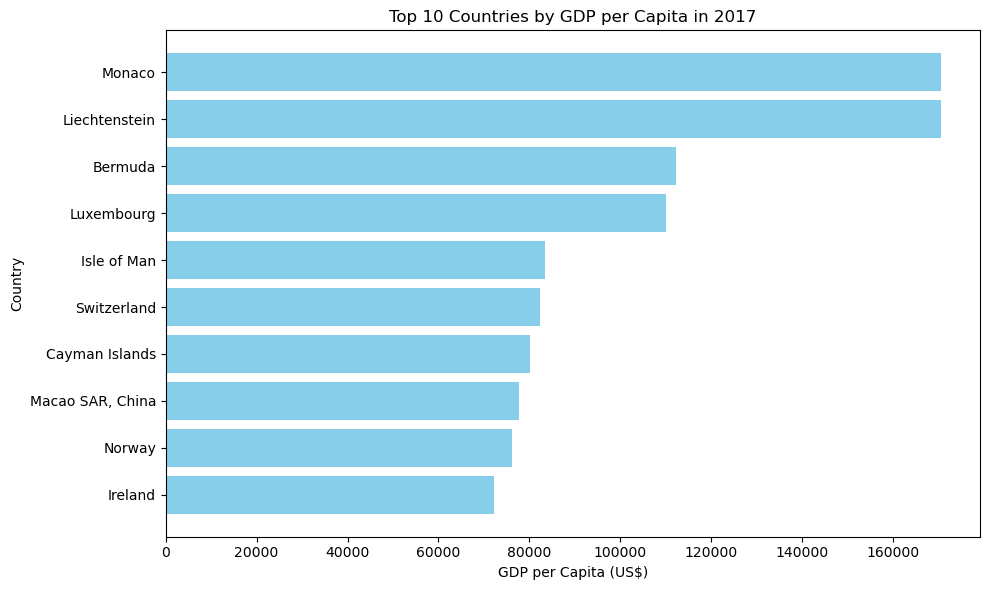

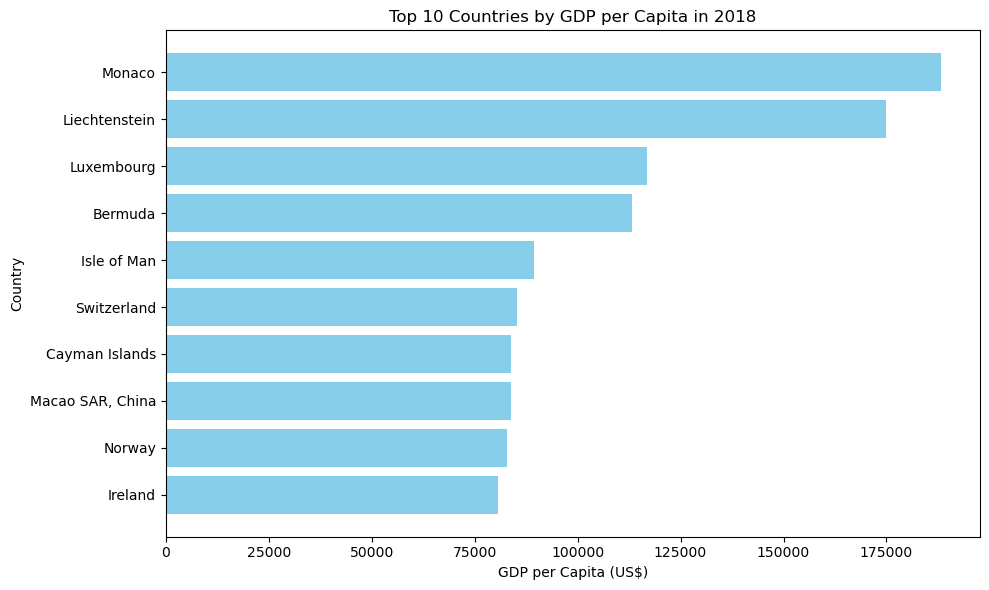

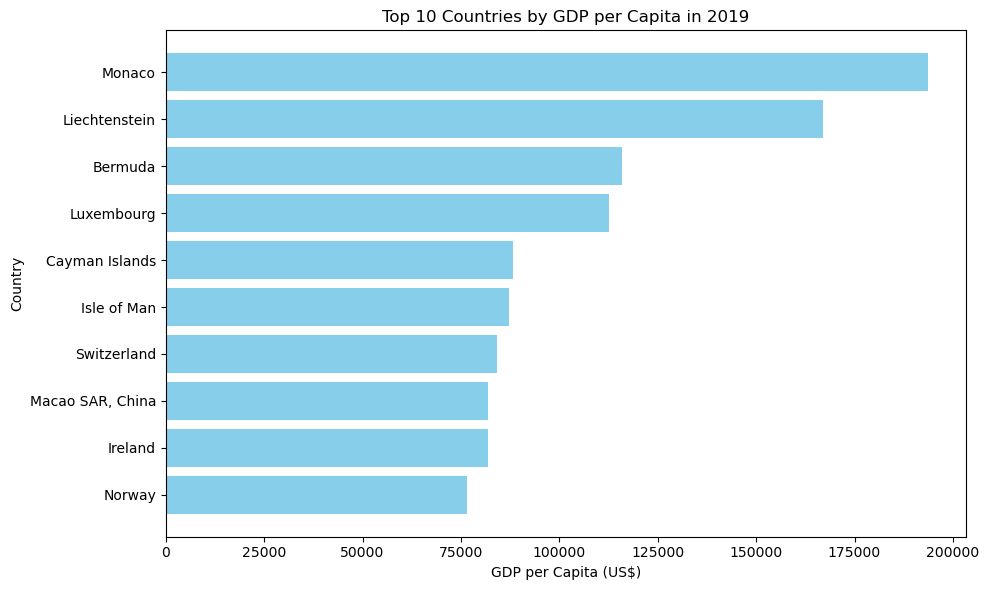

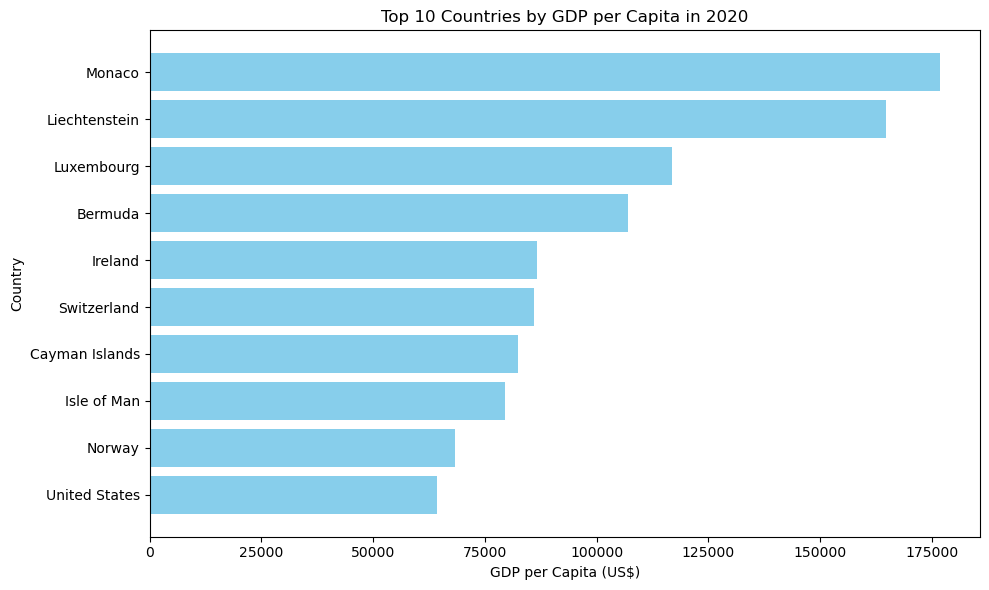

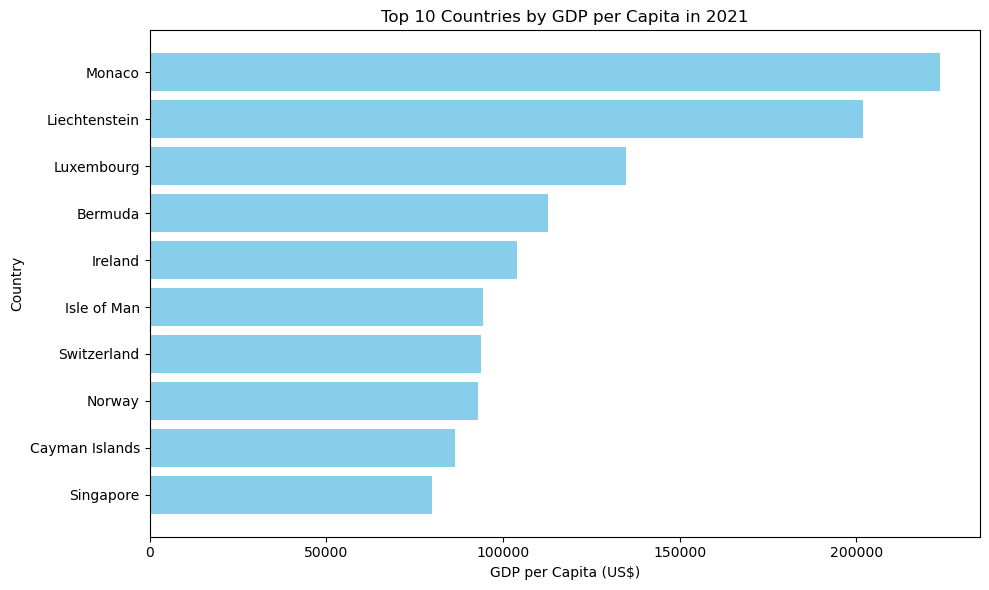

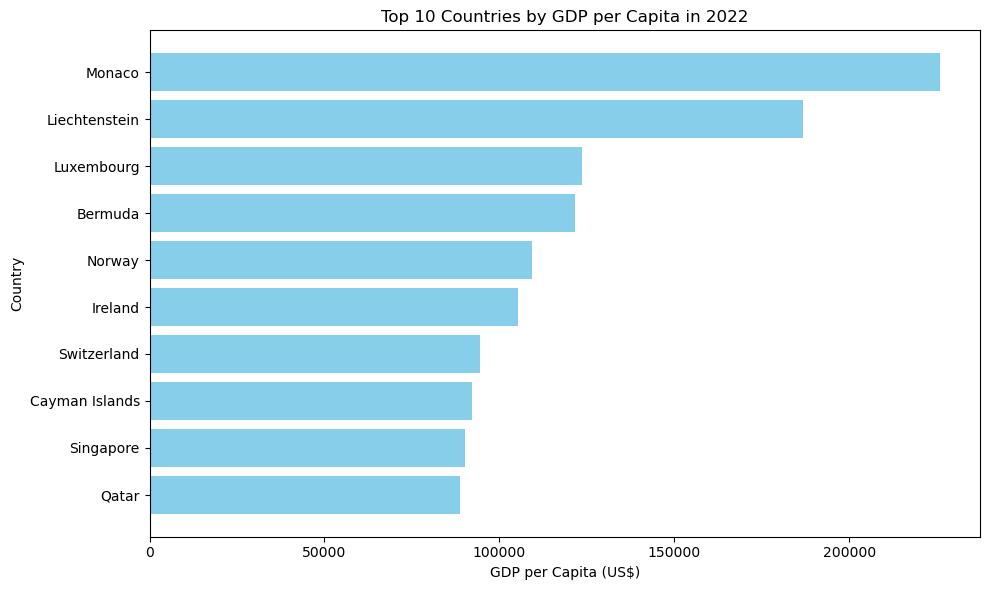

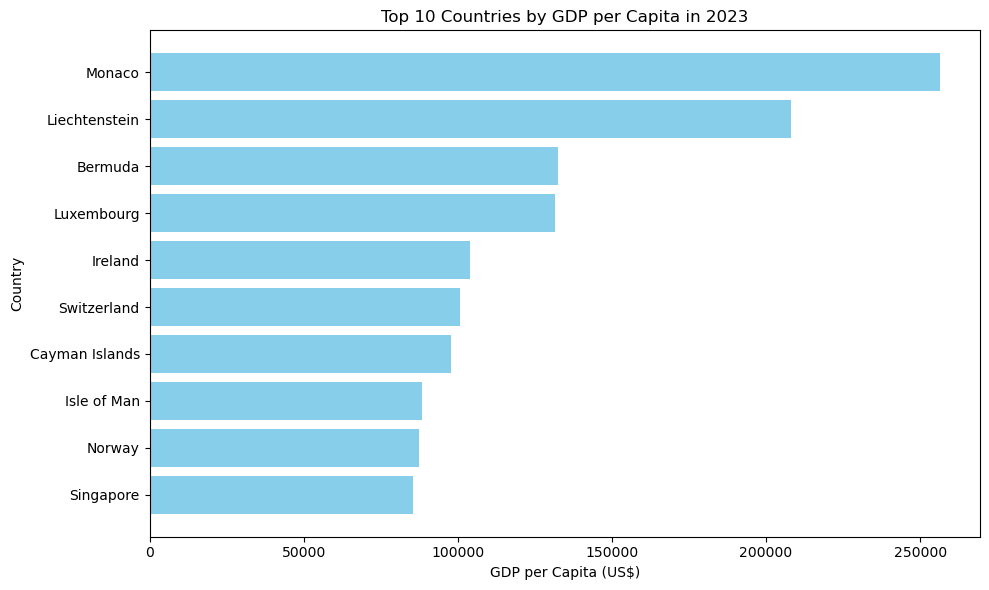

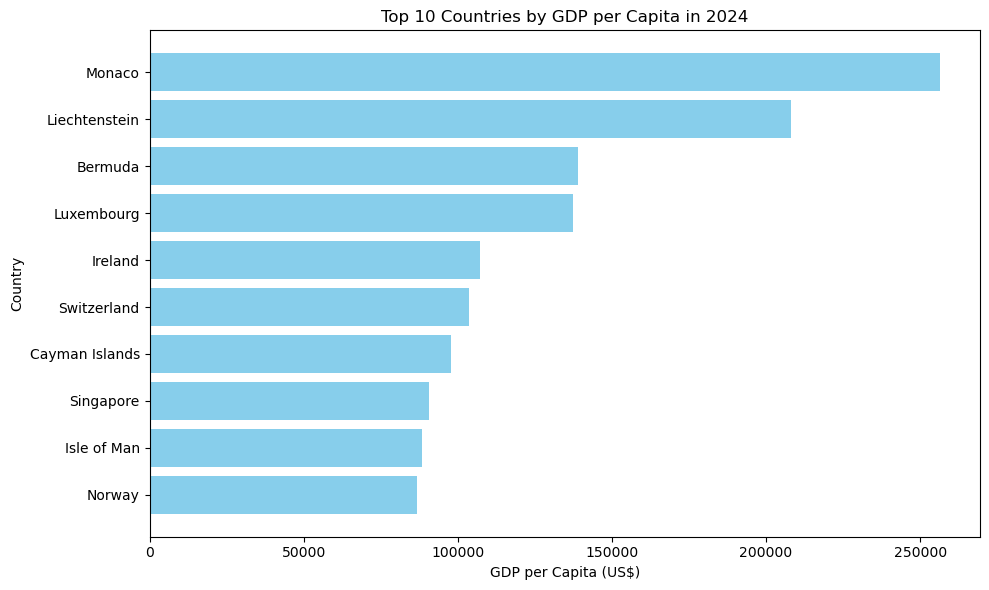

In [57]:
# Show the top 10 GDP countries per year as a table
print("Top 10 GDP Countries per Year:")
print(top10_per_year)

# If you want to save to CSV
top10_per_year.to_csv("top10_gdp_per_year.csv", index=False)

import matplotlib.pyplot as plt

# Loop through each year and make a separate plot
for year, group in top10_per_year.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gdp_per_capita", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gdp_per_capita"], color="skyblue")
    plt.xlabel("GDP per Capita (US$)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by GDP per Capita in {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

##### Comparision of Top !0 by GDP and by total_score 

In [59]:
# Assuming your total_score data is in df_total_score with columns: country, year, total_score
top10_total_score = (
    total_score_df
    .sort_values(["year", "total_score"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True))

In [60]:
# Add an indicator column so we can identify source
top10_per_year["source"] = "GDP"
top10_total_score["source"] = "Total_Score"

# Merge both lists
comparison_df = pd.concat([top10_per_year, top10_total_score], ignore_index=True)

In [61]:
for year in sorted(comparison_df["year"].unique()):
    gdp_countries = set(top10_per_year[top10_per_year["year"] == year]["country"])
    score_countries = set(top10_total_score[top10_total_score["year"] == year]["country"])
    
    overlap = gdp_countries.intersection(score_countries)
    print(f"{year} → Overlap ({len(overlap)} countries): {overlap}")


2017 → Overlap (1 countries): {'Switzerland'}
2018 → Overlap (0 countries): set()
2019 → Overlap (0 countries): set()
2020 → Overlap (2 countries): {'Switzerland', 'United States'}
2021 → Overlap (1 countries): {'Switzerland'}
2022 → Overlap (1 countries): {'Switzerland'}
2023 → Overlap (0 countries): set()
2024 → Overlap (0 countries): set()


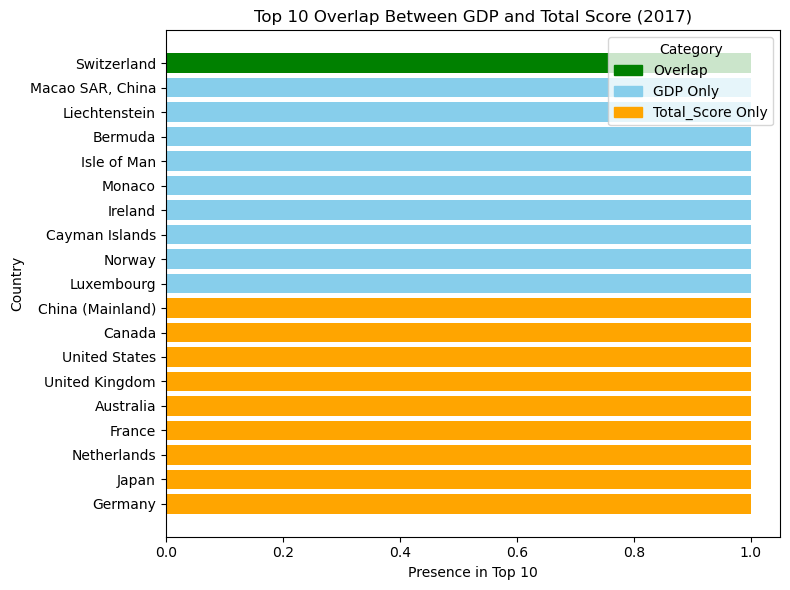

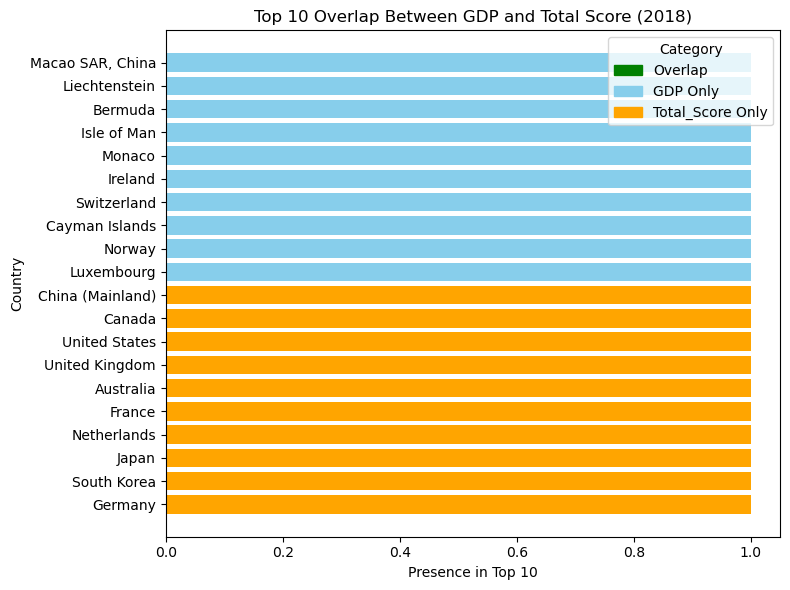

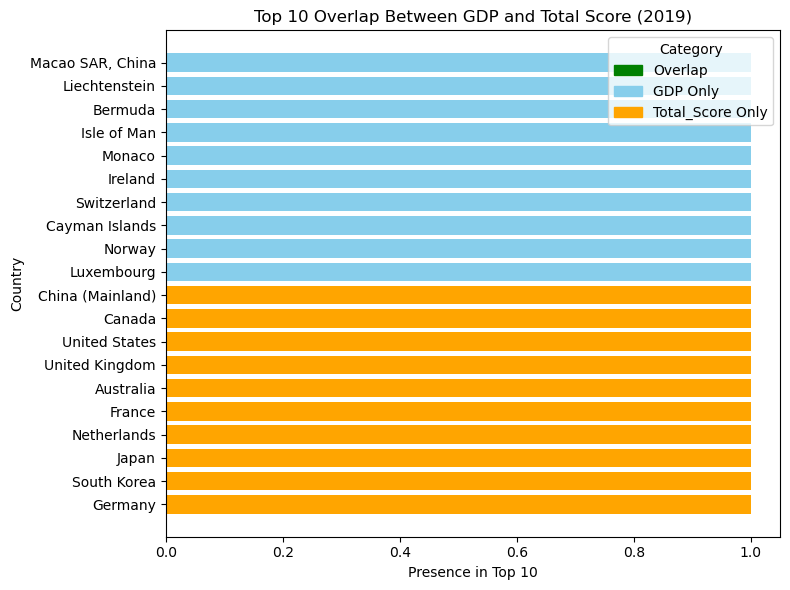

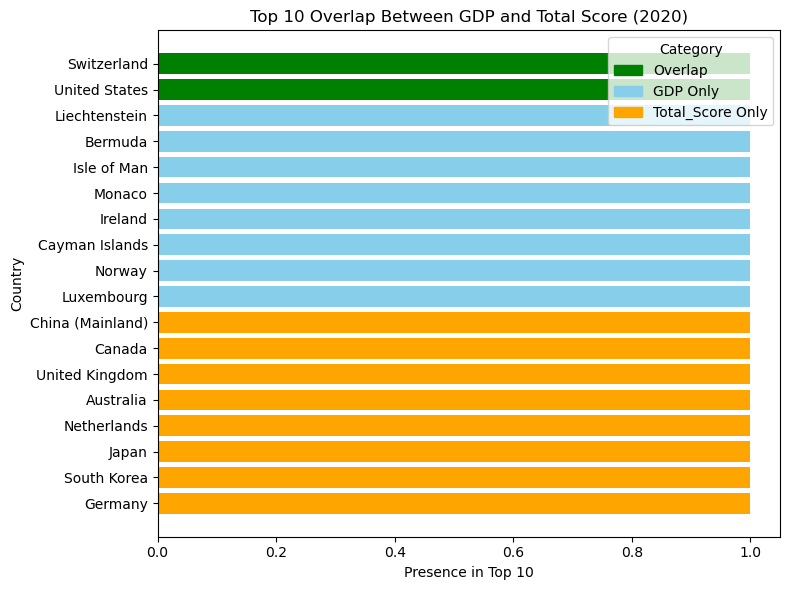

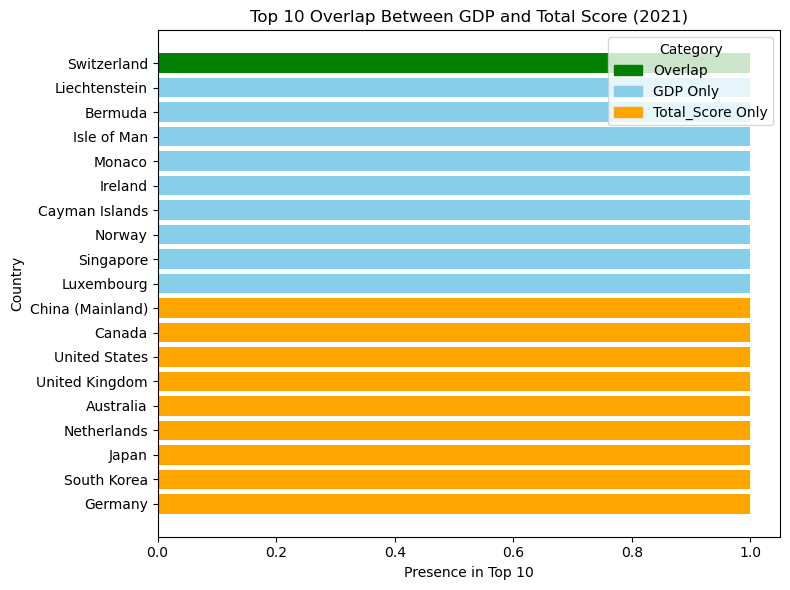

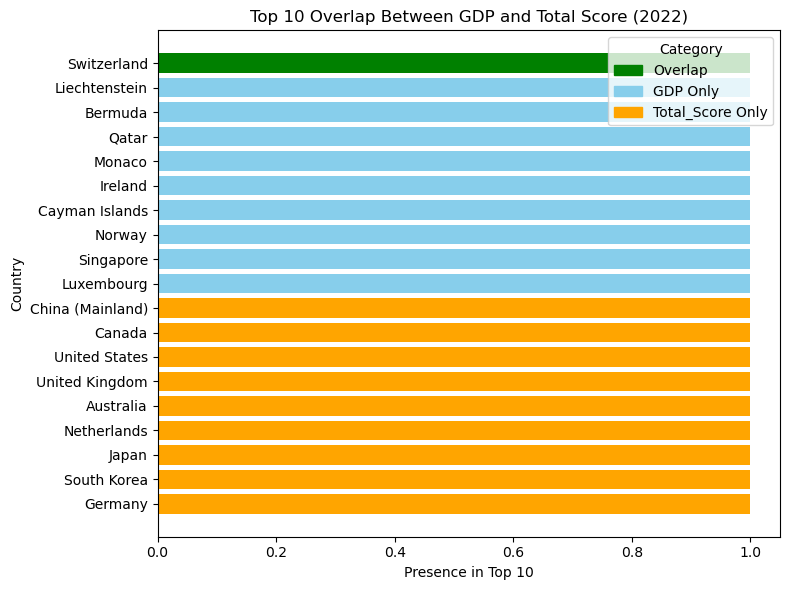

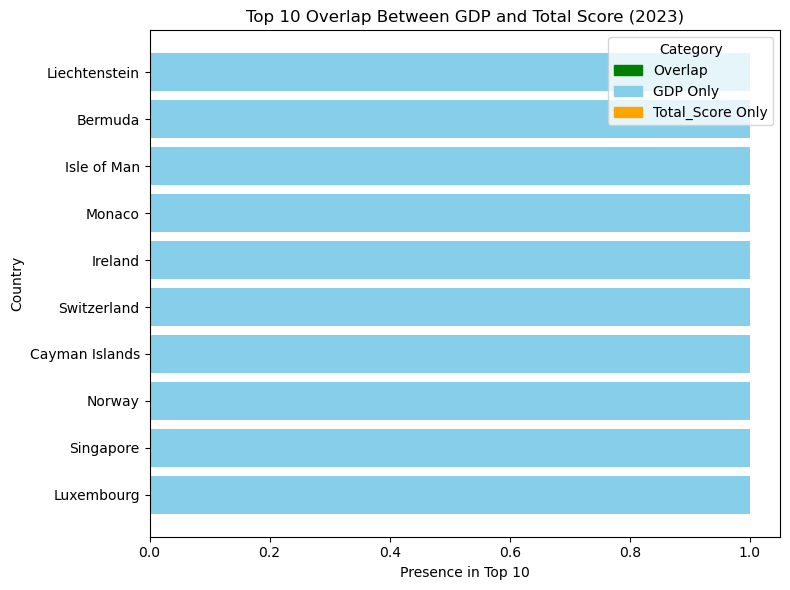

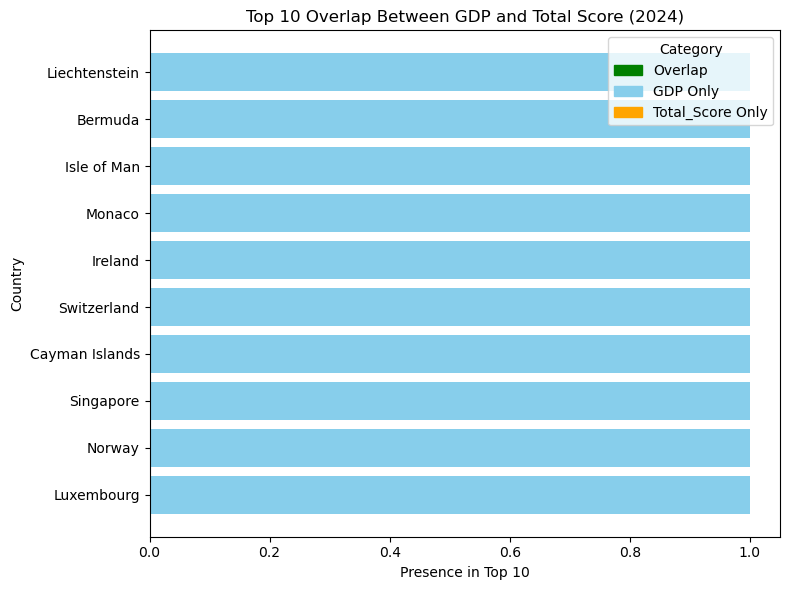

In [62]:
import matplotlib.pyplot as plt

# Loop through each year
for year in sorted(top10_per_year["year"].unique()):
    # Get top 10 GDP and total_score countries for this year
    gdp_countries = set(top10_per_year[top10_per_year["year"] == year]["country"])
    score_countries = set(top10_total_score[top10_total_score["year"] == year]["country"])
    
    overlap = gdp_countries & score_countries
    gdp_only = gdp_countries - score_countries
    score_only = score_countries - gdp_countries
    
    # Prepare data for plotting
    plot_data = []
    for country in overlap:
        plot_data.append((country, "Overlap"))
    for country in gdp_only:
        plot_data.append((country, "GDP Only"))
    for country in score_only:
        plot_data.append((country, "Total_Score Only"))
    
    # Convert to DataFrame
    df_plot = pd.DataFrame(plot_data, columns=["country", "category"])
    
    # Plot
    plt.figure(figsize=(8, 6))
    colors = {"Overlap": "green", "GDP Only": "skyblue", "Total_Score Only": "orange"}
    plt.barh(df_plot["country"], [1] * len(df_plot), color=df_plot["category"].map(colors))
    
    plt.title(f"Top 10 Overlap Between GDP and Total Score ({year})")
    plt.xlabel("Presence in Top 10")
    plt.ylabel("Country")
    plt.gca().invert_yaxis()
    legend_handles = [plt.Rectangle((0,0),1,1,color=colors[k]) for k in colors]
    plt.legend(legend_handles, colors.keys(), title="Category")
    plt.tight_layout()
    plt.show()


#### Goverment Expenditures on Education

In [64]:
# Load dataset
edu_df = pd.read_csv("data/gov_exp_on_edu.csv")

In [65]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB


In [66]:
edu_df.head(5)

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Afghanistan,AFG,..,..,3.2558000087738,4.54397010803223,4.34319019317627,..,..,..,..,..,..,..
1,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Albania,ALB,..,3.4301700592041,3.43796992301941,3.96209001541138,3.61172008514404,3.15294480323792,3.91623997688293,3.3422999382019,3.02255988121033,2.74432992935181,..,..
2,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Algeria,DZA,..,..,6.17633008956909,6.50210857391357,5.73482370376587,5.81275129318237,5.57536554336548,6.1939172744751,5.51403284072876,4.74924659729004,5.61015701293945,..
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Andorra,AND,..,..,3.28034996986389,3.23707008361816,3.21708989143372,3.2467200756073,3.15060997009277,2.63213038444519,2.58397221565247,2.64728999137878,1.92790997028351,..


In [67]:
edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12352\2514134597.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [68]:
edu_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    209
2000 [YR2000]     99
2015 [YR2015]     58
2016 [YR2016]     57
2017 [YR2017]     54
2018 [YR2018]     60
2019 [YR2019]     58
2020 [YR2020]     62
2021 [YR2021]     63
2022 [YR2022]    100
2023 [YR2023]    201
2024 [YR2024]    271
dtype: int64

In [69]:
# 1. Replace ".." placeholders with NaN
edu_df = edu_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
edu_df = edu_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in edu_df.columns if "[YR" in col]
edu_df[year_cols] = edu_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = edu_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    34
2015 [YR2015]    34
2016 [YR2016]    34
2017 [YR2017]    34
2018 [YR2018]    34
2019 [YR2019]    34
2020 [YR2020]    34
2021 [YR2021]    34
2022 [YR2022]    34
2023 [YR2023]    34
dtype: int64


Explanation
Step 1 cleans the placeholder values and fixes data types so interpolation works correctly.

Step 2 removes the problematic years (1990 and 2024).

Step 3 performs row-wise linear interpolation across years so that missing values are filled using values from adjacent years.

Step 4 lets you confirm if any missing values remain after interpolation.

In [71]:
edu_df[edu_df.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Equatorial Guinea,GNQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Eritrea,ERI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,French Polynesia,PYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Greenland,GRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Guam,GUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Step 2: Keep only education expenditure rows
edu_filtered = edu_df[
    edu_df["Series Name"] == "Government expenditure on education, total (% of GDP)"
].copy()

# Step 3: Drop unneeded columns
edu_filtered = edu_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
edu_filtered = edu_filtered.loc[:, ~edu_filtered.columns.str.contains("^Unnamed")]

# Step 4: Reshape from wide to long format
edu_long = edu_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="gov_exp_edu"
)

# Extract just the year number from "2017 [YR2017]"
edu_long["year"] = edu_long["year"].str.extract(r"(\d{4})")

# Rename country column
edu_long = edu_long.rename(columns={"Country Name": "country"})

# Convert to numeric types
edu_long["year"] = pd.to_numeric(edu_long["year"], errors="coerce")
edu_long["gov_exp_edu"] = pd.to_numeric(edu_long["gov_exp_edu"], errors="coerce")

# Drop missing values
edu_long = edu_long.dropna(subset=["year", "gov_exp_edu"])

# Convert year to int
edu_long["year"] = edu_long["year"].astype(int)

# Filter only 2017–2024
edu_long = edu_long[edu_long["year"].between(2017, 2023)]

print(edu_long.dtypes)
print(edu_long.head(10))

country        string[python]
year                    int32
gov_exp_edu           float64
dtype: object
                 country  year  gov_exp_edu
798          Afghanistan  2017     4.343190
799              Albania  2017     3.611720
800              Algeria  2017     5.734824
802              Andorra  2017     3.217090
803               Angola  2017     2.466879
804  Antigua and Barbuda  2017     2.365928
805            Argentina  2017     5.454320
806              Armenia  2017     2.707590
807                Aruba  2017     4.456181
808            Australia  2017     5.321256


#### Gov. Effectivness

In [74]:
# Load dataset
gov_df = pd.read_csv("data/Gov_effect_score .csv")

In [75]:
gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12352\2839557330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [76]:
gov_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    271
2000 [YR2000]     90
2015 [YR2015]     66
2016 [YR2016]     66
2017 [YR2017]     66
2018 [YR2018]     66
2019 [YR2019]     66
2020 [YR2020]     66
2021 [YR2021]     66
2022 [YR2022]     66
2023 [YR2023]     66
2024 [YR2024]    271
dtype: int64

In [77]:
# 1. Replace ".." placeholders with NaN
gov_df = gov_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
gov_df = gov_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in gov_df.columns if "[YR" in col]
gov_df[year_cols] = gov_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = gov_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    66
2015 [YR2015]    66
2016 [YR2016]    66
2017 [YR2017]    66
2018 [YR2018]    66
2019 [YR2019]    66
2020 [YR2020]    66
2021 [YR2021]    66
2022 [YR2022]    66
2023 [YR2023]    66
dtype: int64


In [78]:
gov_df[gov_df.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
27,Government Effectiveness: Percentile Rank,GE.PER.RNK,British Virgin Islands,VGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Government Effectiveness: Percentile Rank,GE.PER.RNK,Channel Islands,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Government Effectiveness: Percentile Rank,GE.PER.RNK,Curacao,CUW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Government Effectiveness: Percentile Rank,GE.PER.RNK,Faroe Islands,FRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Government Effectiveness: Percentile Rank,GE.PER.RNK,French Polynesia,PYF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
# Step 1: Keep only Government Effectiveness rows
gov_eff_filtered = gov_df[
    gov_df["Series Name"] == "Government Effectiveness: Percentile Rank"
].copy()

# Step 2: Drop unneeded columns
gov_eff_filtered = gov_eff_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
gov_eff_filtered = gov_eff_filtered.loc[:, ~gov_eff_filtered.columns.str.contains("^Unnamed")]

# Step 3: Reshape from wide to long format
gov_eff_long = gov_eff_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="gov_effectiveness"
)

# Extract year number from "2017 [YR2017]"
gov_eff_long["year"] = gov_eff_long["year"].str.extract(r"(\d{4})")

# Rename for consistency
gov_eff_long = gov_eff_long.rename(columns={"Country Name": "country"})

# Convert to numeric
gov_eff_long["year"] = pd.to_numeric(gov_eff_long["year"], errors="coerce")
gov_eff_long["gov_effectiveness"] = pd.to_numeric(gov_eff_long["gov_effectiveness"], errors="coerce")

# Drop missing values
gov_eff_long = gov_eff_long.dropna(subset=["year", "gov_effectiveness"])

# Ensure year is integer
gov_eff_long["year"] = gov_eff_long["year"].astype(int)

# Filter for years 2017–2024
gov_eff_long = gov_eff_long[gov_eff_long["year"].between(2017, 2023)]

print(gov_eff_long.dtypes)
print(gov_eff_long.head(10))

country              string[python]
year                          int32
gov_effectiveness           float64
dtype: object
                 country  year  gov_effectiveness
798          Afghanistan  2017           7.142857
799              Albania  2017          57.619049
800              Algeria  2017          31.428572
801       American Samoa  2017          70.476189
802              Andorra  2017          98.095238
803               Angola  2017          17.142857
804  Antigua and Barbuda  2017          51.904762
805            Argentina  2017          58.571430
806              Armenia  2017          42.380951
807                Aruba  2017          78.095238


#### Rsearch and Development

In [81]:
# Load dataset
res_df = pd.read_csv("data/res_dev.csv")  

In [82]:
res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)

C:\Users\User\AppData\Local\Temp\ipykernel_12352\3805319731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).infer_objects(copy=False)


In [83]:
res_df.isna().sum()

Series Name        3
Series Code        5
Country Name       5
Country Code       5
1990 [YR1990]    271
2000 [YR2000]    172
2015 [YR2015]    139
2016 [YR2016]    153
2017 [YR2017]    147
2018 [YR2018]    150
2019 [YR2019]    145
2020 [YR2020]    157
2021 [YR2021]    162
2022 [YR2022]    175
2023 [YR2023]    244
2024 [YR2024]    271
dtype: int64

In [84]:
# 1. Replace ".." placeholders with NaN
res_df = res_df.replace(r"^\s*\.\.\s*$", np.nan, regex=True).convert_dtypes()

# 2. Drop the years with excessive missing values
cols_to_drop = ["1990 [YR1990]", "2024 [YR2024]"]
res_df = res_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Interpolate missing values for the remaining year columns
year_cols = [col for col in res_df.columns if "[YR" in col]
res_df[year_cols] = res_df[year_cols].astype(float).interpolate(
    axis=1, method="linear", limit_direction="both"
)
# 4. (Optional) Check remaining missing values
missing_summary = res_df[year_cols].isna().sum()
print(missing_summary)

2000 [YR2000]    107
2015 [YR2015]    107
2016 [YR2016]    107
2017 [YR2017]    107
2018 [YR2018]    107
2019 [YR2019]    107
2020 [YR2020]    107
2021 [YR2021]    107
2022 [YR2022]    107
2023 [YR2023]    107
dtype: int64


In [85]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series Name    268 non-null    string 
 1   Series Code    266 non-null    string 
 2   Country Name   266 non-null    string 
 3   Country Code   266 non-null    string 
 4   2000 [YR2000]  164 non-null    float64
 5   2015 [YR2015]  164 non-null    float64
 6   2016 [YR2016]  164 non-null    float64
 7   2017 [YR2017]  164 non-null    float64
 8   2018 [YR2018]  164 non-null    float64
 9   2019 [YR2019]  164 non-null    float64
 10  2020 [YR2020]  164 non-null    float64
 11  2021 [YR2021]  164 non-null    float64
 12  2022 [YR2022]  164 non-null    float64
 13  2023 [YR2023]  164 non-null    float64
dtypes: float64(10), string(4)
memory usage: 29.8 KB


In [86]:
# Step 1: Keep only R&D expenditure rows
rd_exp_filtered = res_df[
    res_df["Series Name"] == "Research and development expenditure (% of GDP)"
].copy()

# Step 2: Drop unneeded columns
rd_exp_filtered = rd_exp_filtered.drop(
    columns=["Country Code", "Series Code", "Series Name"], errors="ignore"
)

# Remove unnamed columns if any
rd_exp_filtered = rd_exp_filtered.loc[:, ~rd_exp_filtered.columns.str.contains("^Unnamed")]

# Step 3: Reshape from wide to long format
rd_exp_long = rd_exp_filtered.melt(
    id_vars=["Country Name"], var_name="year", value_name="rd_exp_gdp"
)

# Extract year number from "2017 [YR2017]"
rd_exp_long["year"] = rd_exp_long["year"].str.extract(r"(\d{4})")

# Rename for consistency
rd_exp_long = rd_exp_long.rename(columns={"Country Name": "country"})

# Convert to numeric
rd_exp_long["year"] = pd.to_numeric(rd_exp_long["year"], errors="coerce")
rd_exp_long["rd_exp_gdp"] = pd.to_numeric(rd_exp_long["rd_exp_gdp"], errors="coerce")

# Drop missing values
rd_exp_long = rd_exp_long.dropna(subset=["year", "rd_exp_gdp"])

# Ensure year is integer
rd_exp_long["year"] = rd_exp_long["year"].astype(int)

# Filter for years 2017–2023
rd_exp_long = rd_exp_long[rd_exp_long["year"].between(2017, 2023)]

print(rd_exp_long.dtypes)
print(rd_exp_long.head(10))

country       string[python]
year                   int32
rd_exp_gdp           float64
dtype: object
        country  year  rd_exp_gdp
800     Algeria  2017    0.478650
803      Angola  2017    0.032290
805   Argentina  2017    0.556310
806     Armenia  2017    0.227880
808   Australia  2017    1.879190
809     Austria  2017    3.056560
810  Azerbaijan  2017    0.184680
815     Belarus  2017    0.584110
816     Belgium  2017    2.666660
819     Bermuda  2017    0.217363


In [87]:
rd_exp_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 800 to 2659
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1148 non-null   string 
 1   year        1148 non-null   int32  
 2   rd_exp_gdp  1148 non-null   float64
dtypes: float64(1), int32(1), string(1)
memory usage: 31.4 KB


#### Primary

In [197]:
edu_world_df = pd.read_csv("data/world-education-data.csv")

In [203]:
edu_world_df.dtypes

country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary       float64
school_enrol_primary_pct      float64
school_enrol_secondary_pct    float64
school_enrol_tertiary_pct     float64
dtype: object

In [205]:
total_score_df.dtypes

year             int32
country         object
total_score    float64
dtype: object

In [213]:
# 2) Standardize country names (example)
edu_world_df["country"] = edu_world_df["country"].str.strip()
total_score_df["country"] = total_score_df["country"].str.strip()

# 3) Ensure numeric data for enrollment
for col in ["school_enrol_primary_pct", "school_enrol_secondary_pct", "school_enrol_tertiary_pct"]:
    edu_world_df[col] = pd.to_numeric(edu_world_df[col], errors="coerce")

# 4) Merge datasets on country & year
merged_edu_ind = pd.merge(
    total_score_df, 
    edu_world_df, 
    on=["country", "year"], 
    how="inner"
)

# Drop rows with missing values for correlation
merged_edu_ind = merged_edu_ind.dropna(subset=["total_score", "school_enrol_primary_pct",
                                               "school_enrol_secondary_pct", "school_enrol_tertiary_pct"])

print(merged_edu_ind.head())

   year    country  total_score country_code  gov_exp_pct_gdp  \
0  2017  Argentina         65.8          ARG         5.454320   
1  2017  Australia        884.1          AUS         5.321256   
2  2017    Austria        139.0          AUT         5.371590   
3  2017    Belgium        318.7          BEL         6.425340   
4  2017     Brazil        107.0          BRA         6.320480   

   lit_rate_adult_pct  pri_comp_rate_pct  pupil_teacher_primary  \
0                 NaN         101.581810                    NaN   
1                 NaN                NaN                    NaN   
2                 NaN          98.649178               10.01653   
3                 NaN                NaN               11.27695   
4                93.0                NaN               20.22308   

   pupil_teacher_secondary  school_enrol_primary_pct  \
0                      NaN                111.681458   
1                      NaN                100.637657   
2                  9.32983            

In [215]:
from scipy.stats import pearsonr, spearmanr, kendalltau

indicators = ["school_enrol_primary_pct", "school_enrol_secondary_pct", "school_enrol_tertiary_pct"]
results = []
for ind in indicators:
    pearson_r, pearson_p = pearsonr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    spearman_r, spearman_p = spearmanr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    kendall_r, kendall_p = kendalltau(merged_edu_ind[ind], merged_edu_ind["total_score"])
    
    results.append({
        "Indicator": ind,
        "Pearson_r": pearson_r, "Pearson_p": pearson_p,
        "Spearman_r": spearman_r, "Spearman_p": spearman_p,
        "Kendall_tau": kendall_r, "Kendall_p": kendall_p
    })

corr_df = pd.DataFrame(results)
print(corr_df)

                    Indicator  Pearson_r  Pearson_p  Spearman_r  Spearman_p  \
0    school_enrol_primary_pct  -0.096935   0.162637   -0.063828    0.358541   
1  school_enrol_secondary_pct   0.004322   0.950473    0.165235    0.016807   
2   school_enrol_tertiary_pct   0.202844   0.003223    0.302882    0.000008   

   Kendall_tau  Kendall_p  
0    -0.037224   0.423475  
1     0.090413   0.051880  
2     0.185106   0.000069  


#### Secondary 

In [217]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# --- 1) Standardize predictors ---
X_vars = ["gdp_per_capita", "gov_effectiveness", "gov_exp_edu", "rd_exp_gdp"]

scaler = StandardScaler()
analytic_std = analytic.copy()
analytic_std[X_vars] = scaler.fit_transform(analytic_std[X_vars])

# --- 2) Models ---

# Model 1: No FE
model_no_fe = smf.ols(
    "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp",
    data=analytic_std
).fit()

# Model 2: Year FE only
model_year_fe = smf.ols(
    "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(year)",
    data=analytic_std
).fit()

# Model 3: Country FE only
model_country_fe = smf.ols(
    "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(country)",
    data=analytic_std
).fit()

# Model 4: Both Country & Year FE
model_both_fe = smf.ols(
    "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(country) + C(year)",
    data=analytic_std
).fit()

# --- 3) R² comparison ---
print("\n=== Multiple Regression (OLS, standardized predictors) ===")
print(f"No FE:           R² = {model_no_fe.rsquared:.3f}")
print(f"Year FE only:    R² = {model_year_fe.rsquared:.3f}")
print(f"Country FE only: R² = {model_country_fe.rsquared:.3f}")
print(f"Both FE:         R² = {model_both_fe.rsquared:.3f}")

# --- 4) Coefficients (standardized, easier to compare) ---
print("\nStandardized Coefficients (No FE):")
print(model_no_fe.params[X_vars].sort_values(ascending=False))

print("\nStandardized Coefficients (Year FE):")
print(model_year_fe.params[X_vars].sort_values(ascending=False))

print("\nStandardized Coefficients (Country FE):")
print(model_country_fe.params[X_vars].sort_values(ascending=False))

print("\nStandardized Coefficients (Both FE):")
print(model_both_fe.params[X_vars].sort_values(ascending=False))

# --- 5) Optionally save summaries ---
with open("ols_no_fe_std.txt", "w") as f: f.write(model_no_fe.summary().as_text())
with open("ols_year_fe_std.txt", "w") as f: f.write(model_year_fe.summary().as_text())
with open("ols_country_fe_std.txt", "w") as f: f.write(model_country_fe.summary().as_text())
with open("ols_both_fe_std.txt", "w") as f: f.write(model_both_fe.summary().as_text())


=== Multiple Regression (OLS, standardized predictors) ===
No FE:           R² = 0.144
Year FE only:    R² = 0.149
Country FE only: R² = 0.997
Both FE:         R² = 0.997

Standardized Coefficients (No FE):
rd_exp_gdp           229.074059
gdp_per_capita        87.754506
gov_effectiveness     -3.259928
gov_exp_edu          -62.032766
dtype: float64

Standardized Coefficients (Year FE):
rd_exp_gdp           233.174246
gdp_per_capita       104.253810
gov_effectiveness    -19.816521
gov_exp_edu          -67.684633
dtype: float64

Standardized Coefficients (Country FE):
gov_effectiveness     38.554986
gov_exp_edu           -7.371924
gdp_per_capita       -33.771400
rd_exp_gdp          -181.759042
dtype: float64

Standardized Coefficients (Both FE):
gov_effectiveness     38.159081
gov_exp_edu           -6.309239
gdp_per_capita       -37.464076
rd_exp_gdp          -163.224451
dtype: float64


#### Tertiary 

## Correlation Analysis

#### Overview Compute and visualize: Pearson & Spearman correlation between:

Heatmaps of correlation matrix

Optional: Scatter plots with regression line (GDP vs Score)

Key Analyses & Visuals Distribution of Country Rankings

Histogram of average ranks across countries. Boxplots grouped by income level or region. Correlation Heatmap

Pearson correlations between:Average QS rank GDP per capita Literacy rate R&D expenditure

Time Series Trends

Line plots for selected countries showing:

Rank trend (2017–2022) GDP/literacy/R&D over time

Top & Bottom Performers Table or bar plot of top 10 and bottom 10 countries by average rank.

Scatterplots GDP vs. rank, Literacy vs. rank, R&D vs. rank

Add regression line and confidence interval.

Interpretation Example: "Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

#### GDP

In [94]:
# Merge GDP with ranking stats
merged_df = pd.merge(gdp_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df.head(10)

,country,year,gdp_per_capita,total_score
0,Argentina,2017,14532.500931,65.8
1,Australia,2017,53901.714539,884.1
2,Austria,2017,47163.742578,139.0
3,Belgium,2017,44035.323936,318.7
4,Brazil,2017,10080.509282,107.0
5,Canada,2017,45129.628117,733.1
6,Chile,2017,14879.908623,101.4
7,Colombia,2017,6479.532313,77.4
8,Denmark,2017,57521.551499,191.5
9,Finland,2017,46085.017474,164.5


In [95]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Clean numeric conversion
def to_numeric(series):
    return pd.to_numeric(series, errors="coerce")

# Ensure numeric
merged_df['total_score'] = to_numeric(merged_df['total_score'])
merged_df['gdp_per_capita'] = to_numeric(merged_df['gdp_per_capita'])

# Drop missing rows
corr_df = merged_df.dropna(subset=['total_score', 'gdp_per_capita'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gdp_per_capita'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gdp_per_capita'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gdp_per_capita'])

print("=== Correlation with GDP per Capita ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with GDP per Capita ===
Pearson:  r = 0.3032, p = 4.89e-06
Spearman: rho = 0.5255, p = 6.023e-17
Kendall:  tau = 0.3746, p = 1.617e-16


#### Goverment Expenditures on Edu

In [97]:
# Merge GDP with ranking stats
merged_df_edu = pd.merge(edu_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_edu.head(10)

,country,year,gov_exp_edu,total_score
0,Argentina,2017,5.454320,65.8
1,Australia,2017,5.321256,884.1
2,Austria,2017,5.371590,139.0
3,Belgium,2017,6.425340,318.7
4,Brazil,2017,6.320480,107.0
5,Canada,2017,4.959970,733.1
6,Chile,2017,5.432790,101.4
7,Colombia,2017,3.511210,77.4
8,Denmark,2017,7.115860,191.5
9,Finland,2017,6.363110,164.5


In [98]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Ensure numeric
merged_df_edu['total_score'] = pd.to_numeric(merged_df_edu['total_score'], errors='coerce')
merged_df_edu['gov_exp_edu'] = pd.to_numeric(merged_df_edu['gov_exp_edu'], errors='coerce')

# Drop missing rows
corr_df = merged_df_edu.dropna(subset=['total_score', 'gov_exp_edu'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gov_exp_edu'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gov_exp_edu'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gov_exp_edu'])

print("=== Correlation with Government Expenditure on Education ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with Government Expenditure on Education ===
Pearson:  r = 0.1182, p = 0.08086
Spearman: rho = 0.2294, p = 0.0006235
Kendall:  tau = 0.1600, p = 0.0004323


#### Goverment Effectivness

In [100]:
# Merge Gov effectivness with ranking stats
merged_df_gov = pd.merge(gov_eff_long, total_score_df, on=["country", "year"])

# Final columns: country, year, gdp_per_capita, score, university_count
merged_df_gov.head(5)

,country,year,gov_effectiveness,total_score
0,Argentina,2017,58.571430,65.8
1,Australia,2017,91.428574,884.1
2,Austria,2017,90.952377,139.0
3,Belgium,2017,85.714287,318.7
4,Brazil,2017,40.000000,107.0


In [101]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Ensure numeric
merged_df_gov['total_score'] = pd.to_numeric(merged_df_gov['total_score'], errors='coerce')
merged_df_gov['gov_effectiveness'] = pd.to_numeric(merged_df_gov['gov_effectiveness'], errors='coerce')

# Drop missing rows
corr_df = merged_df_gov.dropna(subset=['total_score', 'gov_effectiveness'])

# Pearson
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['gov_effectiveness'])

# Spearman
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['gov_effectiveness'])

# Kendall
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['gov_effectiveness'])

print("=== Correlation with Government Effectiveness ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with Government Effectiveness ===
Pearson:  r = 0.2974, p = 7.534e-06
Spearman: rho = 0.5589, p = 2.161e-19
Kendall:  tau = 0.3668, p = 8.106e-16


#### Research and Development 

In [103]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import pandas as pd

# Assuming:
# rd_exp_long → cleaned dataset with ['country', 'year', 'rd_exp_gdp']
# merged_df   → main dataset with ['country', 'year', 'total_score']

# --- Merge R&D data into main dataset ---
merged_rd = pd.merge(
    merged_df,
    rd_exp_long,
    on=["country", "year"],
    how="inner"
)

# Ensure numeric types
merged_rd['total_score'] = pd.to_numeric(merged_rd['total_score'], errors='coerce')
merged_rd['rd_exp_gdp'] = pd.to_numeric(merged_rd['rd_exp_gdp'], errors='coerce')

# Drop NaNs
corr_df = merged_rd.dropna(subset=['total_score', 'rd_exp_gdp'])

# --- Pearson ---
pearson_corr, pearson_p = pearsonr(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Spearman ---
spearman_corr, spearman_p = spearmanr(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Kendall ---
kendall_corr, kendall_p = kendalltau(corr_df['total_score'], corr_df['rd_exp_gdp'])

# --- Print ---
print("=== Correlation with R&D Expenditure (% of GDP) ===")
print(f"Pearson:  r = {pearson_corr:.4f}, p = {pearson_p:.4g}")
print(f"Spearman: rho = {spearman_corr:.4f}, p = {spearman_p:.4g}")
print(f"Kendall:  tau = {kendall_corr:.4f}, p = {kendall_p:.4g}")

=== Correlation with R&D Expenditure (% of GDP) ===
Pearson:  r = 0.3576, p = 8.018e-08
Spearman: rho = 0.6235, p = 2.432e-24
Kendall:  tau = 0.4143, p = 2.512e-19


### Visualizations

### Analysis

In [106]:
import pandas as pd
import statsmodels.api as sm

# Merge your datasets (ensure GDP and total_score match in country-year)
merged_df = total_score_df.merge(gdp_long, on=["country", "year"], how="inner")

# Independent and dependent variables
X = merged_df["gdp_per_capita"]
y = merged_df["total_score"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_score   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     21.97
Date:                Wed, 13 Aug 2025   Prob (F-statistic):           4.89e-06
Time:                        07:05:04   Log-Likelihood:                -1732.4
No. Observations:                 219   AIC:                             3469.
Df Residuals:                     217   BIC:                             3476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            102.5591     78.625      1.

#### Interpretation Example:
"Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

Data has different column names but actually multiple columns contain the same information.
Common column pair:

'university'='institution'
'rank_display'='Rank'
'score'='score scaled'
'country'='location'

## Limitations and Sensitivity Analysis
Acknowledge:

Data gaps (missing GDP or score values)

Different educational systems

Assumption of linearity

Sensitivity:

Simulate ±10% change in GDP → observe score impact via ARIMAX

## Overall Analysis 

## What is next?

### Multiple regression Analysis

Extends single regression by including two or more independent variables to explain a dependent variable.

In [191]:
# === 0) Imports
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -------------------------------------------------------------------
# === 1) Normalize column names & fix typos
def normalize_cols(df):
    df = df.copy()
    df.columns = (
        df.columns
          .str.strip()
          .str.lower()
          .str.replace(r"\s+", "_", regex=True)
    )
    rename_map = {
        "ountry": "country",
        "total score": "total_score",
        "gdp_percapita": "gdp_per_capita",
        "gov.effectivnes": "gov_effectiveness",
        "gov.effectiveness": "gov_effectiveness",
        "gov_exp_on_education": "gov_exp_edu",
        "reseacrh_and_development": "rd_exp_gdp",
        "research_and_development": "rd_exp_gdp",
        "rd_exp_%gdp": "rd_exp_gdp",
        "rd_exp_gdp(%)": "rd_exp_gdp",
    }
    df = df.rename(columns=rename_map)
    return df

merged_df      = normalize_cols(merged_df)
merged_df_edu  = normalize_cols(merged_df_edu)
merged_df_gov  = normalize_cols(merged_df_gov)
merged_rd      = normalize_cols(merged_rd)

base = merged_df[["country","year","gdp_per_capita","total_score"]].copy()
edu  = merged_df_edu[["country","year","gov_exp_edu","total_score"]].copy()
gov  = merged_df_gov[["country","year","gov_effectiveness","total_score"]].copy()
rd   = merged_rd[["country","year","rd_exp_gdp","total_score"]].copy()

# -------------------------------------------------------------------
# === 2) Deduplicate
def dedupe(df, cols_keep):
    return (
        df.groupby(["country","year"], as_index=False)
          .agg({c:"mean" for c in cols_keep if c not in ["country","year"]})
    )

base = dedupe(base, base.columns)
edu  = dedupe(edu,  edu.columns)
gov  = dedupe(gov,  gov.columns)
rd   = dedupe(rd,   rd.columns)

# -------------------------------------------------------------------
# === 3) Merge into single analytic dataset
analytic = (
    base
      .merge(edu[["country","year","gov_exp_edu"]], on=["country","year"], how="left")
      .merge(gov[["country","year","gov_effectiveness"]], on=["country","year"], how="left")
      .merge(rd[["country","year","rd_exp_gdp"]], on=["country","year"], how="left")
)

analytic = analytic.query("year >= 2017 and year <= 2022")
analytic = analytic.dropna(subset=["total_score","gdp_per_capita","gov_exp_edu","gov_effectiveness","rd_exp_gdp"]).copy()

print("Rows:", len(analytic))
print(analytic.head())

analytic.to_csv("analytic_multivariate_dataset.csv", index=False)

# -------------------------------------------------------------------
# === 4) VIF
X_vars = ["gdp_per_capita","gov_effectiveness","gov_exp_edu","rd_exp_gdp"]
X_scaled = StandardScaler().fit_transform(analytic[X_vars])
vif = pd.DataFrame({
    "feature": X_vars,
    "VIF": [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
})
print("\nVariance Inflation Factors (VIF):\n", vif.sort_values("VIF", ascending=False))

# -------------------------------------------------------------------
# === 5) OLS (no fixed effects)
X = sm.add_constant(analytic[X_vars])
y = analytic["total_score"].values
ols_plain = sm.OLS(y, X).fit()
print("\n=== OLS (no fixed effects) ===")
print(ols_plain.summary())

# -------------------------------------------------------------------
# === 6) OLS with fixed effects
formula_fe = "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(country) + C(year)"
ols_fe = smf.ols(formula=formula_fe, data=analytic).fit()
print("\n=== OLS with Country & Year Fixed Effects ===")
print(ols_fe.summary())

# -------------------------------------------------------------------
# === 7) Standardized coefficients
scaler_X = StandardScaler()
scaler_y = StandardScaler()
Xs = scaler_X.fit_transform(analytic[X_vars])
ys = scaler_y.fit_transform(analytic[["total_score"]]).ravel()
ols_std = sm.OLS(ys, sm.add_constant(Xs)).fit()
beta_coefs = pd.Series(ols_std.params[1:], index=X_vars, name="std_beta")
print("\nStandardized Betas (plain OLS):\n", beta_coefs.sort_values(ascending=False))

# -------------------------------------------------------------------
# === 8) Ridge & Lasso
alphas = np.logspace(-3, 3, 25)
ridge = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas=alphas, cv=5))
])
lasso = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LassoCV(alphas=alphas, cv=5, max_iter=10000))
])
X_mat = analytic[X_vars].values
y_vec = analytic["total_score"].values

ridge.fit(X_mat, y_vec)
lasso.fit(X_mat, y_vec)

ridge_coefs = pd.Series(ridge.named_steps["model"].coef_, index=X_vars, name="ridge_coef")
lasso_coefs = pd.Series(lasso.named_steps["model"].coef_, index=X_vars, name="lasso_coef")

print("\nRidge best alpha:", ridge.named_steps["model"].alpha_)
print("Ridge coefficients:\n", ridge_coefs.sort_values(ascending=False))
print("\nLasso best alpha:", lasso.named_steps["model"].alpha_)
print("Lasso coefficients:\n", lasso_coefs.sort_values(ascending=False))

# -------------------------------------------------------------------
# === 9) Metrics with updated RMSE
def metrics(y_true, y_pred, label):
    print(f"\n[{label}] R2={r2_score(y_true,y_pred):.3f}  "
          f"MAE={mean_absolute_error(y_true,y_pred):.2f}  "
          f"RMSE={root_mean_squared_error(y_true,y_pred):.2f}")

metrics(y_vec, ols_plain.predict(X), "OLS no-FE")
metrics(y_vec, ols_fe.fittedvalues, "OLS with FE")
metrics(y_vec, ridge.predict(X_mat), "Ridge")
metrics(y_vec, lasso.predict(X_mat), "Lasso")

# -------------------------------------------------------------------
# === 10) Save OLS plain coefficient table
coef_table = pd.DataFrame({
    "variable": ["const"] + X_vars,
    "coef": ols_plain.params,
    "std_err": ols_plain.bse,
    "t": ols_plain.tvalues,
    "pval": ols_plain.pvalues
})
coef_table.to_csv("ols_plain_coef_table.csv", index=False)
print("\nSaved: ols_plain_coef_table.csv")


Rows: 213
     country  year  gdp_per_capita  total_score  gov_exp_edu  \
0  Argentina  2017    14532.500931         65.8      5.45432   
1  Argentina  2018    11752.799892         69.1      4.87774   
2  Argentina  2019     9955.974787         66.2      4.77165   
3  Argentina  2020     8535.599380         66.0      5.27690   
4  Argentina  2021    10738.017922         67.5      4.64117   

   gov_effectiveness  rd_exp_gdp  
0          58.571430     0.55631  
1          52.857143     0.48830  
2          48.095238     0.47813  
3          43.333332     0.54126  
4          37.142857     0.52216  

Variance Inflation Factors (VIF):
              feature       VIF
1  gov_effectiveness  3.334924
0     gdp_per_capita  2.841605
3         rd_exp_gdp  2.162625
2        gov_exp_edu  1.282044

=== OLS (no fixed effects) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.144
Model:        

In [193]:
# --- Model 1: No Fixed Effects ---
formula_no_fe = "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp"
ols_no_fe = smf.ols(formula=formula_no_fe, data=analytic).fit()

# --- Model 2: Year Fixed Effects only ---
formula_year_fe = "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(year)"
ols_year_fe = smf.ols(formula=formula_year_fe, data=analytic).fit()

# --- Model 3: Country Fixed Effects only ---
formula_country_fe = "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(country)"
ols_country_fe = smf.ols(formula=formula_country_fe, data=analytic).fit()

# --- Model 4: Both Country & Year Fixed Effects ---
formula_both_fe = "total_score ~ gdp_per_capita + gov_effectiveness + gov_exp_edu + rd_exp_gdp + C(country) + C(year)"
ols_both_fe = smf.ols(formula=formula_both_fe, data=analytic).fit()

# --- Print R² comparison ---
print("\n=== Fixed Effects Comparison ===")
print(f"No FE:           R² = {ols_no_fe.rsquared:.3f}")
print(f"Year FE only:    R² = {ols_year_fe.rsquared:.3f}")
print(f"Country FE only: R² = {ols_country_fe.rsquared:.3f}")
print(f"Both FE:         R² = {ols_both_fe.rsquared:.3f}")

# --- Optional: check key coefficients for Year FE model ---
print("\nYear FE model coefficients:")
print(ols_year_fe.params[["gdp_per_capita","gov_effectiveness","gov_exp_edu","rd_exp_gdp"]])

# --- Optional: save summaries to text files ---
with open("ols_no_fe.txt", "w") as f: f.write(ols_no_fe.summary().as_text())
with open("ols_year_fe.txt", "w") as f: f.write(ols_year_fe.summary().as_text())
with open("ols_country_fe.txt", "w") as f: f.write(ols_country_fe.summary().as_text())
with open("ols_both_fe.txt", "w") as f: f.write(ols_both_fe.summary().as_text())



=== Fixed Effects Comparison ===
No FE:           R² = 0.144
Year FE only:    R² = 0.149
Country FE only: R² = 0.997
Both FE:         R² = 0.997

Year FE model coefficients:
gdp_per_capita         0.004059
gov_effectiveness     -1.011625
gov_exp_edu          -49.819332
rd_exp_gdp           190.766878
dtype: float64


## Conclusion 

Summary of Findings Economic and educational indicators have strong predictive power for national-level university rankings.

GDP per capita and R&D spending were the most influential variables.

ARIMAX and Monte Carlo performed best overall, balancing accuracy and interpretability.

Limitations Rankings are partly subjective and may not fully reflect educational quality.

External factors (e.g., geopolitical shifts, funding cuts, pandemic effects) are not modeled.

Data availability and consistency varied by country.

Future Work Include more indicators: internet access, tertiary enrollment rate, faculty-to-student ratio.

Expand to university-level forecasting (not just country-level).

Deploy an interactive dashboard or app to visualize predictions dynamically. 

Summarize key findings:

Which models performed best?

Does GDP help?

Implications for policy or further study

Future improvements:

Use additional indicators (e.g., literacy, R&D)

Include university-specific features

## Acknowledgements and References
Cite sources of datasets, QS ranking methodology, ARIMA/ARIMAX theory, etc.